<a href="https://colab.research.google.com/github/Ciiku-Kihara/KNN-TITANIC-PROJECT-SPAM-MAIL-PREDICTION/blob/main/Spam_mail_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question

### a) Specifying the analysis question

Build a model that predicts whether an email is spam or ham.

### b) Defining the metric for success

Be able to effectively use Naive Bayes to build an efficient model that can predict whether an email is spam or ham with at least 80% accuracy

### c) Understanding the context

A spam email, is an unsolicited message often advertising a product, containing links to malware, or attempting to scam the recipient. Roughly 80-90% of more than 100 billion emails sent each day are spam emails, most being sent from botnets of malware-infected computers. The remainder of emails are called ham emails.

As a result of the huge number of spam emails being sent across the Internet each day, most email providers offer a spam filter that automatically flags likely spam messages and separates them from the ham. Though these filters use a number of techniques, most rely heavily on the analysis of the contents of an email via text analytics.

### d) Recording the experimental design

- Read and explore the given dataset
- Define the appropriateness of the available data to answer the given question
- Find and deal with outliers, anomalies, and missing data within the dataset
- Perform Exploratory Data Analysis.
- Build a model using Naive Bayes algorithm 
- Challenge the solution.
- Optimize the model
- Make conclusions



### e) Data Relevance

The dataset contains adequate information to build my models

## 2. Importing relevant libraries

In [1]:
# Loading necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

## 3. Loading and checking the data

In [2]:
# Loading our dataset 

spam = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data')


In [3]:
# Getting a preview of the first 5 rows

spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
# Naming the columns

values = np.random.random_integers(1, 60, 58)

columns = {}
column_base = 'Column'

for i, value in enumerate(values):
    columns['{:s}{:d}'.format(column_base, i)] = value

spam.columns = columns

# Preview of the dataset

spam.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 60 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [5]:
# Reading the description

des = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names', sep='\t')
des.head()

,| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
0,|
1,"| 48 continuous real [0,100] attributes of typ..."
2,| = percentage of words in the e-mail that mat...
3,| i.e. 100 * (number of times the WORD appears...
4,"| total number of words in e-mail. A ""word"" i..."


In [6]:
# Determining the number of rows and columns in the dataset

spam.shape

# This dataset has 4600 observations and 58 columns

(4600, 58)

In [7]:
# Determining the names of the columns present in the dataset

spam.columns

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21', 'Column22', 'Column23',
       'Column24', 'Column25', 'Column26', 'Column27', 'Column28', 'Column29',
       'Column30', 'Column31', 'Column32', 'Column33', 'Column34', 'Column35',
       'Column36', 'Column37', 'Column38', 'Column39', 'Column40', 'Column41',
       'Column42', 'Column43', 'Column44', 'Column45', 'Column46', 'Column47',
       'Column48', 'Column49', 'Column50', 'Column51', 'Column52', 'Column53',
       'Column54', 'Column55', 'Column56', 'Column57'],
      dtype='object')

In [8]:
# Checking if each column is of the appropriate data type

spam.dtypes

# All the 58 columns seem to be of the appropriate data type.

Column0     float64
Column1     float64
Column2     float64
Column3     float64
Column4     float64
Column5     float64
Column6     float64
Column7     float64
Column8     float64
Column9     float64
Column10    float64
Column11    float64
Column12    float64
Column13    float64
Column14    float64
Column15    float64
Column16    float64
Column17    float64
Column18    float64
Column19    float64
Column20    float64
Column21    float64
Column22    float64
Column23    float64
Column24    float64
Column25    float64
Column26    float64
Column27    float64
Column28    float64
Column29    float64
Column30    float64
Column31    float64
Column32    float64
Column33    float64
Column34    float64
Column35    float64
Column36    float64
Column37    float64
Column38    float64
Column39    float64
Column40    float64
Column41    float64
Column42    float64
Column43    float64
Column44    float64
Column45    float64
Column46    float64
Column47    float64
Column48    float64
Column49    float64


## 4. External data source validation

The dataset has been validated against information from the link below:

https://archive.ics.uci.edu/ml/datasets/Spambase

## 5. Data cleaning


In [9]:
# Stripping the columns of any probable white spaces and changing all the columns to lowercase

spam.columns = spam.columns.str.strip().str.replace('Column57', 'mail').str.lower()

# Viewing the column names

spam.columns

Index(['column0', 'column1', 'column2', 'column3', 'column4', 'column5',
       'column6', 'column7', 'column8', 'column9', 'column10', 'column11',
       'column12', 'column13', 'column14', 'column15', 'column16', 'column17',
       'column18', 'column19', 'column20', 'column21', 'column22', 'column23',
       'column24', 'column25', 'column26', 'column27', 'column28', 'column29',
       'column30', 'column31', 'column32', 'column33', 'column34', 'column35',
       'column36', 'column37', 'column38', 'column39', 'column40', 'column41',
       'column42', 'column43', 'column44', 'column45', 'column46', 'column47',
       'column48', 'column49', 'column50', 'column51', 'column52', 'column53',
       'column54', 'column55', 'column56', 'mail'],
      dtype='object')

In [10]:
# Checking for presence of null values

spam.isnull().sum()

# There are no missing values in the dataset

column0     0
column1     0
column2     0
column3     0
column4     0
column5     0
column6     0
column7     0
column8     0
column9     0
column10    0
column11    0
column12    0
column13    0
column14    0
column15    0
column16    0
column17    0
column18    0
column19    0
column20    0
column21    0
column22    0
column23    0
column24    0
column25    0
column26    0
column27    0
column28    0
column29    0
column30    0
column31    0
column32    0
column33    0
column34    0
column35    0
column36    0
column37    0
column38    0
column39    0
column40    0
column41    0
column42    0
column43    0
column44    0
column45    0
column46    0
column47    0
column48    0
column49    0
column50    0
column51    0
column52    0
column53    0
column54    0
column55    0
column56    0
mail        0
dtype: int64

In [11]:
# Checking if there are any duplicated rows

spam.duplicated().sum()

# There are 391 duplicated rows

391

In [12]:
# Dropping the duplicated observations

spam.drop_duplicates(inplace=True)

# Confirming the duplicates have been dropped

spam.duplicated().sum()

0

In [13]:
# Checking for any anomalies in the mail column

spam['mail'].unique()

# There are only two categories present as expected

array([1, 0])

In [14]:
# Checking for Outliers in each column usinh IQR

Q1 = spam.quantile(0.25)
Q3 = spam.quantile(0.75)
IQR = Q3 - Q1

((spam < (Q1 - 1.5 * IQR)) | (spam > (Q3 + 1.5 * IQR))).sum()

# All columns save for mail have outliers

column0      982
column1      810
column2      293
column3       46
column4      449
column5      933
column6      762
column7      767
column8      722
column9      748
column10     651
column11     250
column12     806
column13     336
column14     305
column15     840
column16     906
column17     971
column18      58
column19     389
column20     193
column21     112
column22     619
column23     659
column24    1010
column25     789
column26     667
column27     452
column28     359
column29     456
column30     279
column31     196
column32     397
column33     206
column34     470
column35     582
column36     809
column37      78
column38     378
column39     422
column40     143
column41     335
column42     353
column43     317
column44     805
column45     500
column46      60
column47     201
column48     750
column49     255
column50     505
column51     373
column52     730
column53     702
column54     329
column55     418
column56     498
mail           0
dtype: int64

In [15]:
# Determining how many rows would be lost if outliers were removed

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = spam.quantile(0.25)
Q3 = spam.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range
# ---
# 
spam_new = spam[~((spam < (Q1 - 1.5 * IQR)) | (spam > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(spam_new.shape)

# Printing the shape of our old dataset
# ---
#
print(spam.shape)

# Number of rows removed

rows_removed = spam.shape[0] - spam_new.shape[0]
print('Number of rows removed:', rows_removed)

# Percentage of rows removed of the percentage
row_percent = (rows_removed/spam.shape[0]) * 100
print('Percentage of rows removed:', row_percent)

# Removing the outliers in this dataset will leave us with very
# high dimentionality data. An accurate model cannot be built with data with
# such few columns

(114, 58)
(4209, 58)
Number of rows removed: 4095
Percentage of rows removed: 97.29151817533857


## 6. Exploratory Data Analysis

### a) Univariate Analysis

In [16]:
# Previewing the columns

spam.columns

Index(['column0', 'column1', 'column2', 'column3', 'column4', 'column5',
       'column6', 'column7', 'column8', 'column9', 'column10', 'column11',
       'column12', 'column13', 'column14', 'column15', 'column16', 'column17',
       'column18', 'column19', 'column20', 'column21', 'column22', 'column23',
       'column24', 'column25', 'column26', 'column27', 'column28', 'column29',
       'column30', 'column31', 'column32', 'column33', 'column34', 'column35',
       'column36', 'column37', 'column38', 'column39', 'column40', 'column41',
       'column42', 'column43', 'column44', 'column45', 'column46', 'column47',
       'column48', 'column49', 'column50', 'column51', 'column52', 'column53',
       'column54', 'column55', 'column56', 'mail'],
      dtype='object')

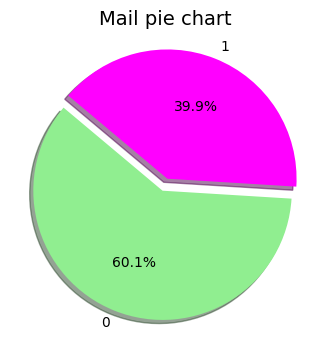

In [17]:
# Mail analysis

cross = spam['mail'].value_counts()
plt.figure(figsize= (4,4), dpi=100)

# Highlighting yes
explode = (0.1, 0)  
colors = ['lightgreen', 'magenta']

# Plotting our pie chart
cross.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Mail pie chart', fontsize=14)
plt.ylabel('')
plt.show()
print(' ')


# Of the total number of emails, 39.9% are spam(1) and 60.1% of them are not spam(0) 

In [18]:
# Creating a function for the coefficients of variation

def variation(var):
  print('The skewness is:', spam[var].skew())
  print('The kurtosis is:', spam[var].kurt())
  print('The coefficient of variation is:', spam[var].std()/spam[var].mean())

In [19]:
# Creating a list called feat with all the feature names

feat = ['column0', 'column1', 'column2', 'column3', 'column4', 'column5',
       'column6', 'column7', 'column8', 'column9', 'column10', 'column11',
       'column12', 'column13', 'column14', 'column15', 'column16', 'column17',
       'column18', 'column19', 'column20', 'column21', 'column22', 'column23',
       'column24', 'column25', 'column26', 'column27', 'column28', 'column29',
       'column30', 'column31', 'column32', 'column33', 'column34', 'column35',
       'column36', 'column37', 'column38', 'column39', 'column40', 'column41',
       'column42', 'column43', 'column44', 'column45', 'column46', 'column47',
       'column48', 'column49', 'column50', 'column51', 'column52', 'column53',
       'column54', 'column55', 'column56']

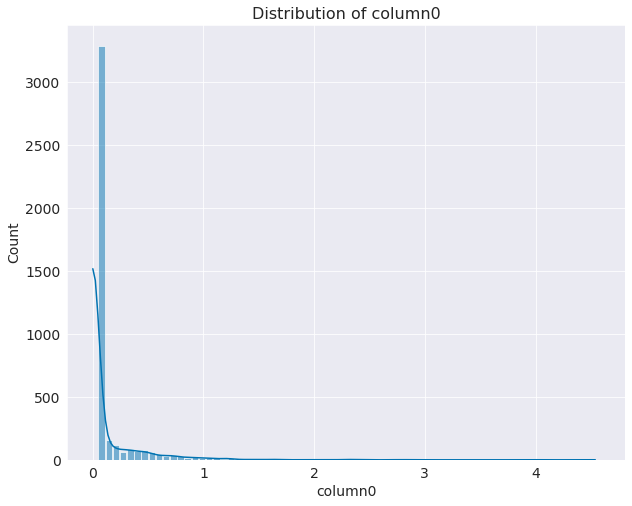



The skewness is: 5.869173727940259
The kurtosis is: 54.339150808949654
The coefficient of variation is: 2.874169200843465
**************************************************





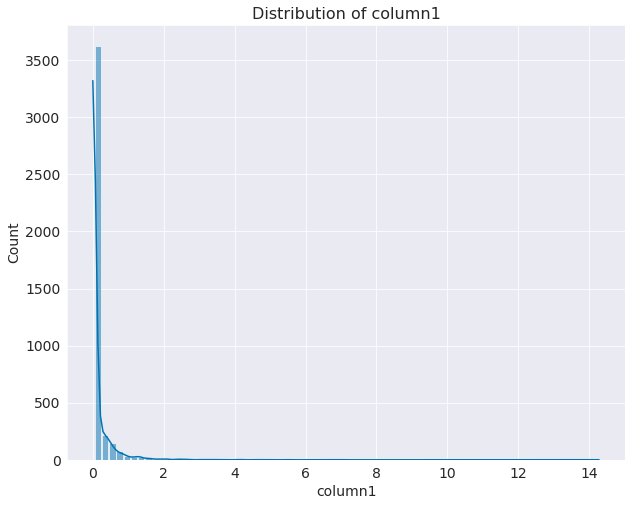



The skewness is: 13.469991513513268
The kurtosis is: 306.8253529808409
The coefficient of variation is: 4.036613075088988
**************************************************





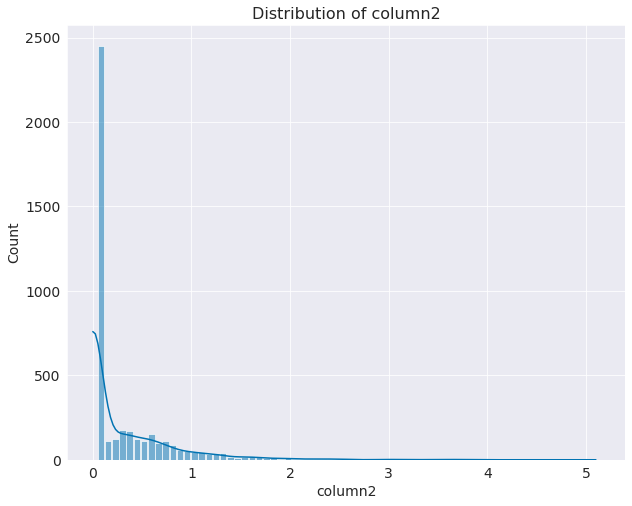



The skewness is: 2.9811627768769746
The kurtosis is: 12.94299101097194
The coefficient of variation is: 1.7699716518203483
**************************************************





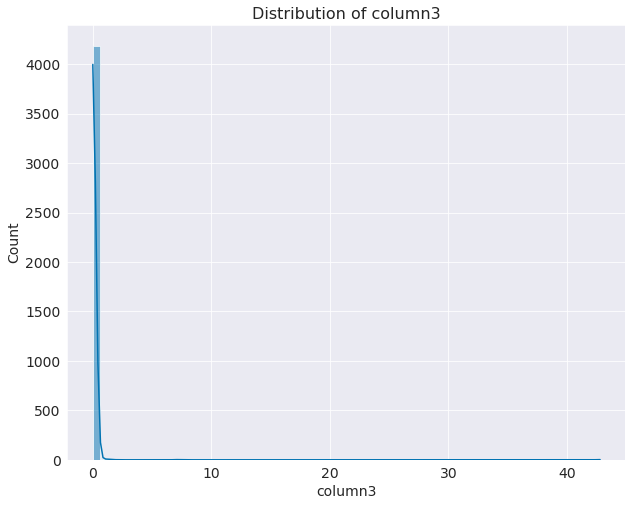



The skewness is: 27.206297575969852
The kurtosis is: 788.1819174508497
The coefficient of variation is: 21.438815507268206
**************************************************





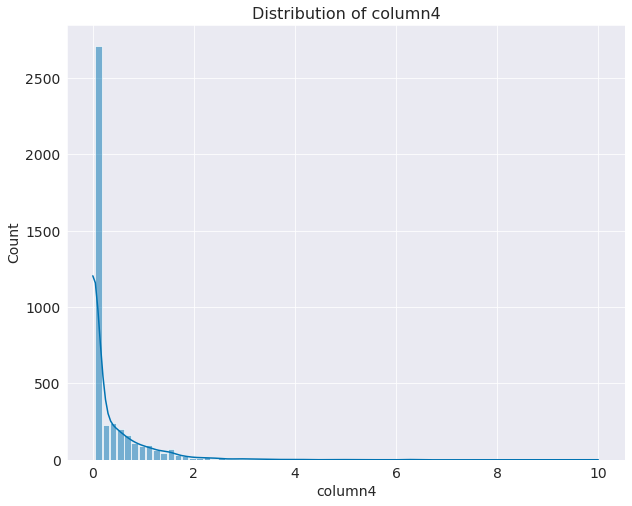



The skewness is: 4.696382772659861
The kurtosis is: 37.055261098523694
The coefficient of variation is: 2.114480604725625
**************************************************





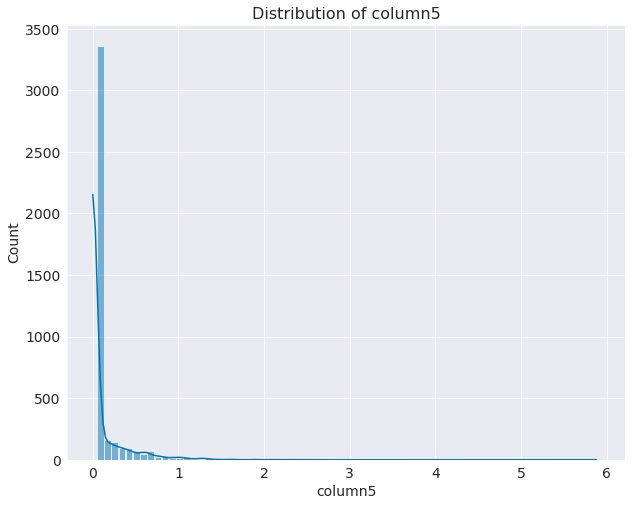



The skewness is: 6.1219544253119516
The kurtosis is: 71.58787084702482
The coefficient of variation is: 2.8554322894850865
**************************************************





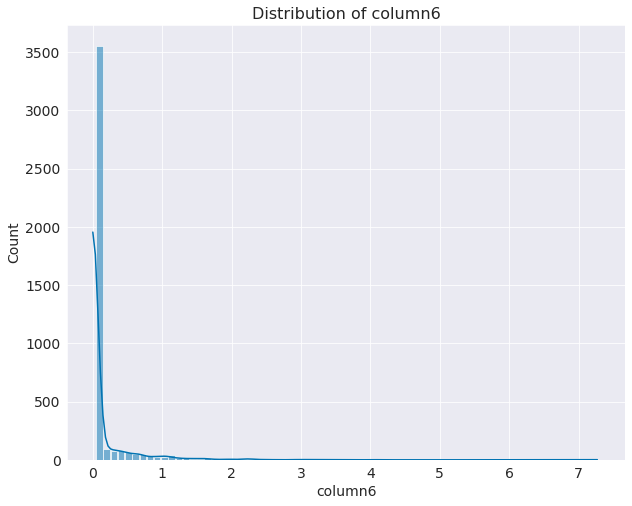



The skewness is: 6.807906579773227
The kurtosis is: 76.3641949123544
The coefficient of variation is: 3.381418823982501
**************************************************





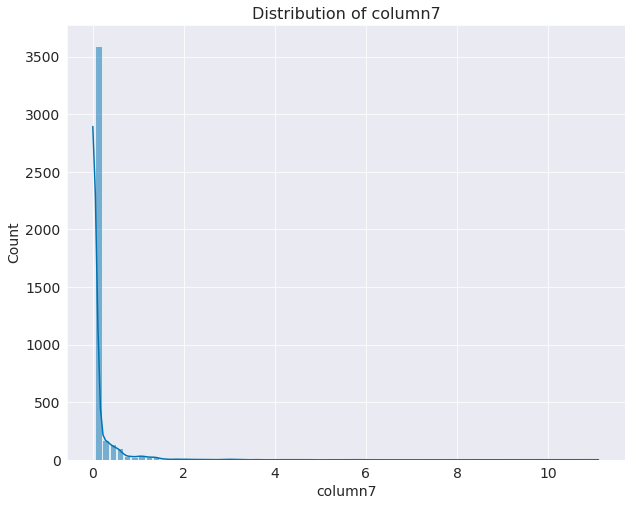



The skewness is: 9.733133596027866
The kurtosis is: 167.51293337575424
The coefficient of variation is: 3.7984288867132014
**************************************************





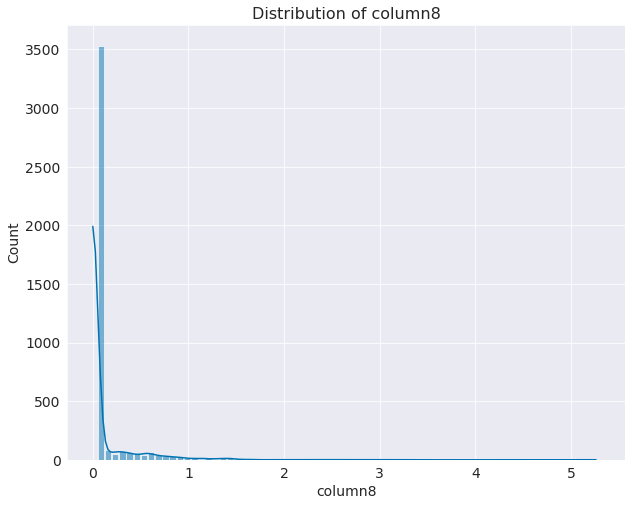



The skewness is: 5.283654571595999
The kurtosis is: 48.00020082630735
The coefficient of variation is: 3.0710556214444567
**************************************************





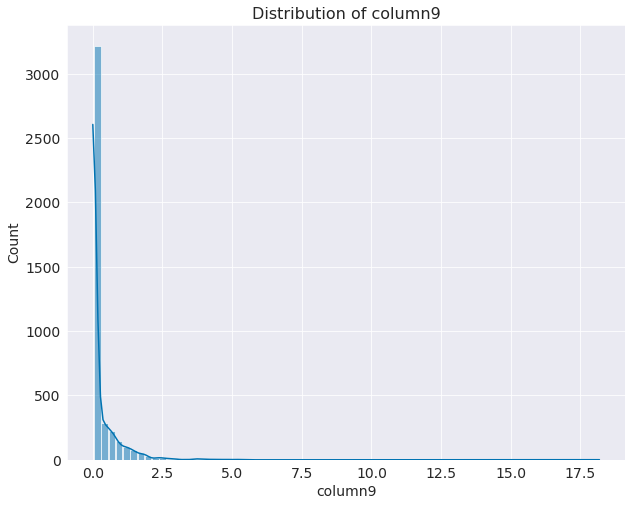



The skewness is: 8.567741898908952
The kurtosis is: 162.5079296988639
The coefficient of variation is: 2.6428959788205315
**************************************************





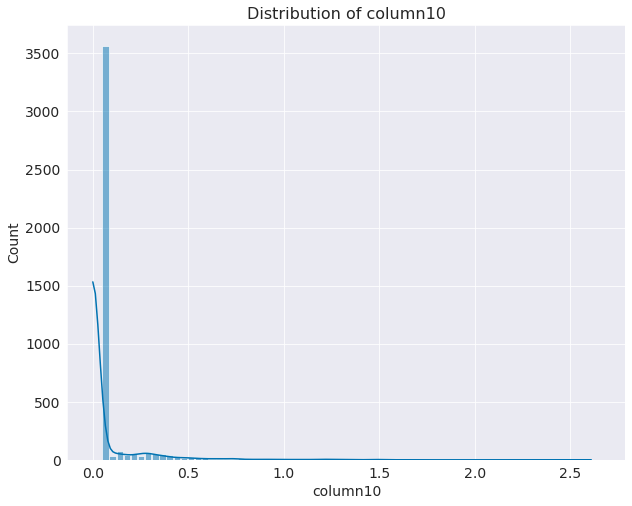



The skewness is: 5.077636973477189
The kurtosis is: 34.64739113970077
The coefficient of variation is: 3.24844169175715
**************************************************





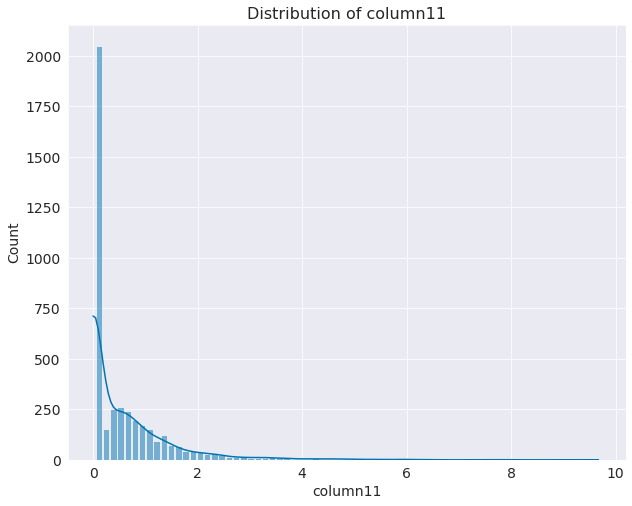



The skewness is: 2.8277365521173525
The kurtosis is: 12.092765250140161
The coefficient of variation is: 1.561638762717177
**************************************************





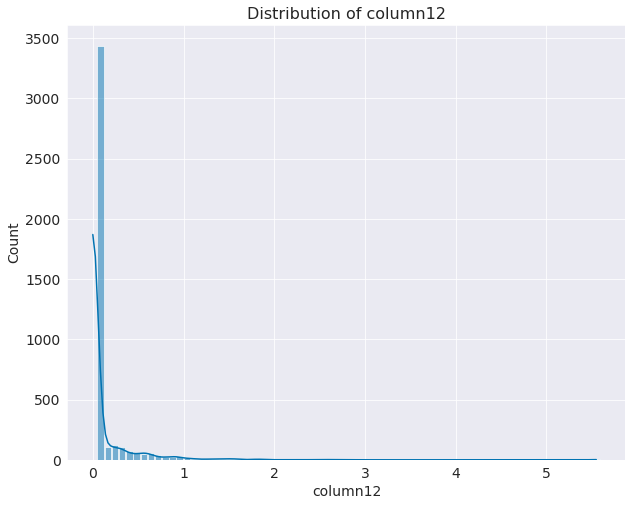



The skewness is: 6.8891610370263034
The kurtosis is: 82.57797168178872
The coefficient of variation is: 3.166935638571301
**************************************************





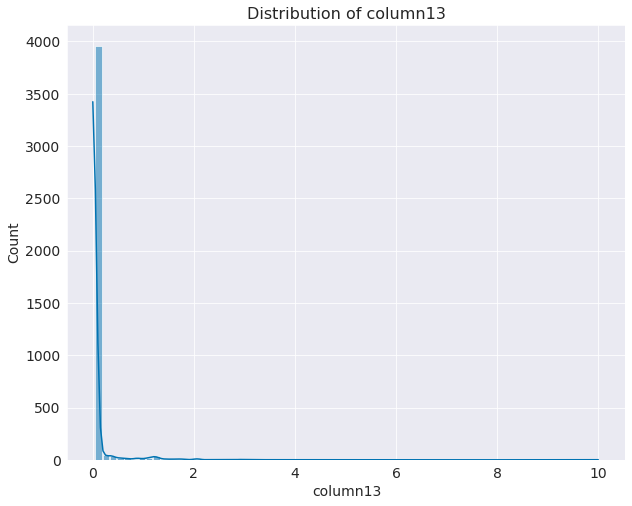



The skewness is: 11.562773334177226
The kurtosis is: 219.59369626670897
The coefficient of variation is: 5.652922699304729
**************************************************





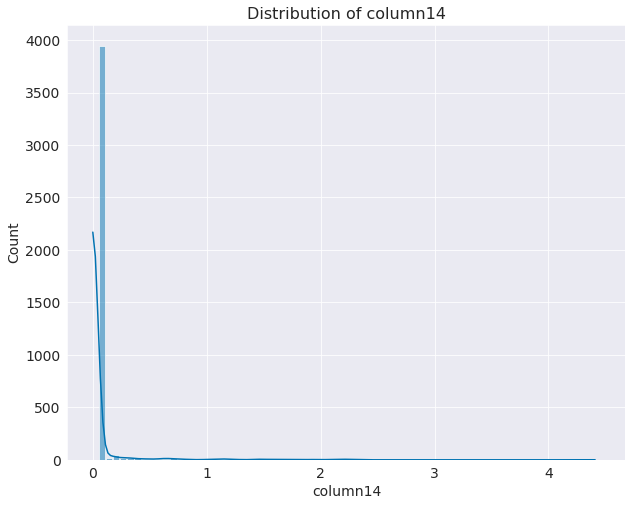



The skewness is: 7.512444903028923
The kurtosis is: 69.47646558523311
The coefficient of variation is: 5.404929209257934
**************************************************





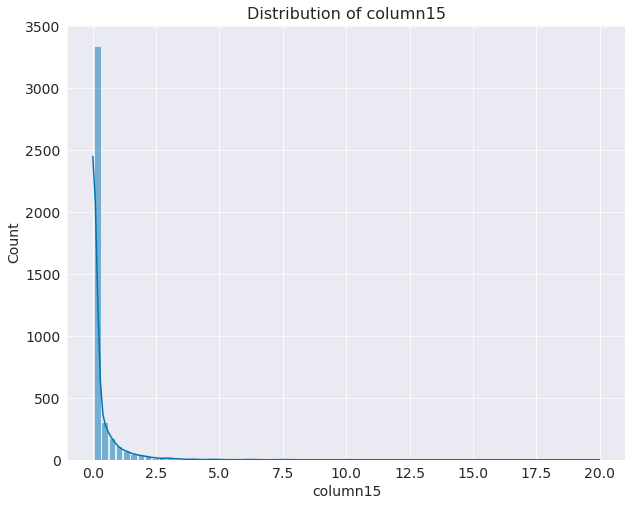



The skewness is: 9.386712973531367
The kurtosis is: 157.6548832340598
The coefficient of variation is: 3.142580407232787
**************************************************





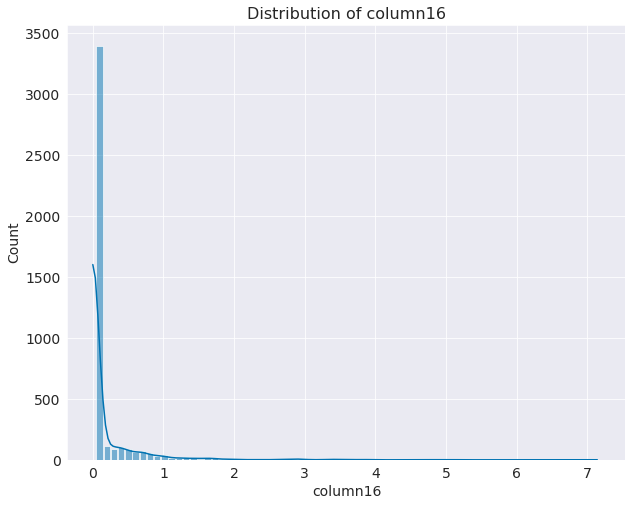



The skewness is: 5.5669942456617605
The kurtosis is: 43.50376731096345
The coefficient of variation is: 3.0680217953219544
**************************************************





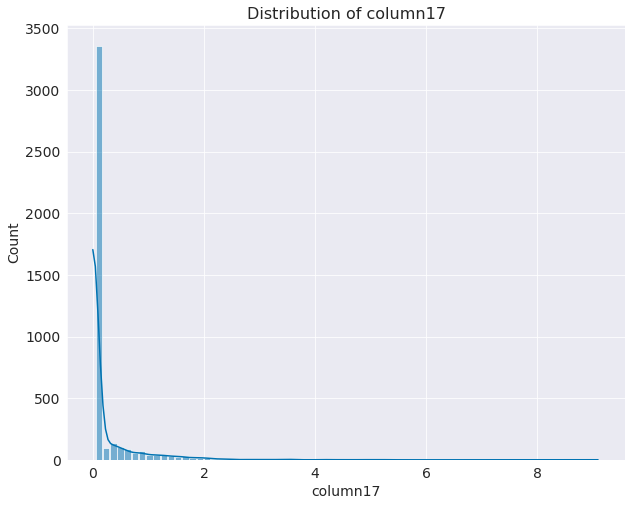



The skewness is: 5.460725646297481
The kurtosis is: 48.25263597137497
The coefficient of variation is: 2.8697576612200373
**************************************************





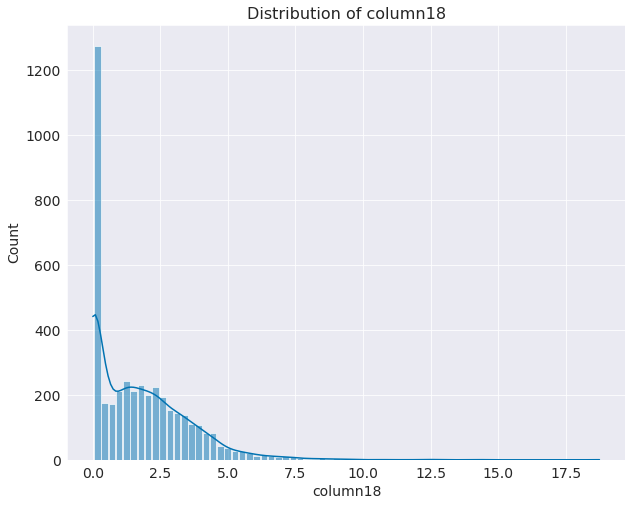



The skewness is: 1.5241626034380504
The kurtosis is: 4.996395214111898
The coefficient of variation is: 1.0294760186298584
**************************************************





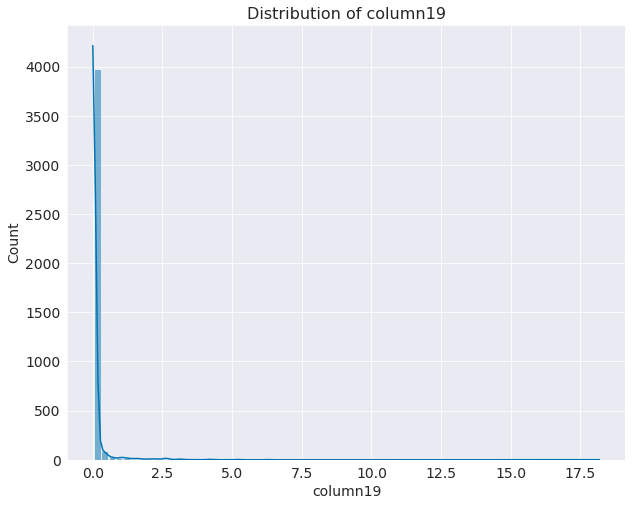



The skewness is: 15.428379669818945
The kurtosis is: 424.58757535095395
The coefficient of variation is: 5.949966607720611
**************************************************





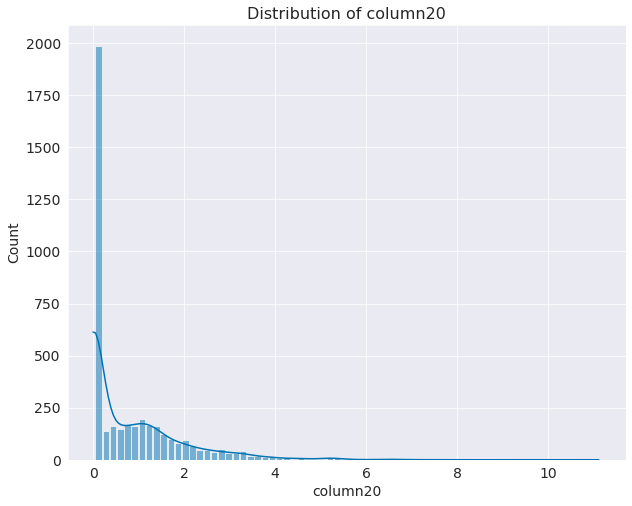



The skewness is: 2.2455464028702368
The kurtosis is: 8.09193870468441
The coefficient of variation is: 1.4191106256343056
**************************************************





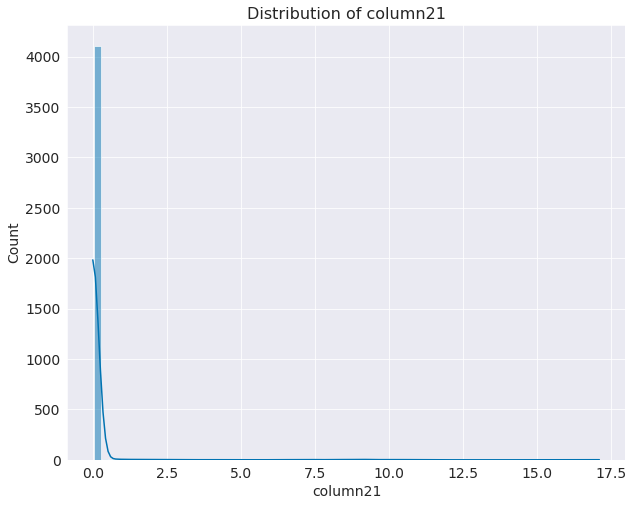



The skewness is: 9.54036505287693
The kurtosis is: 99.64135241672561
The coefficient of variation is: 8.140102384194474
**************************************************





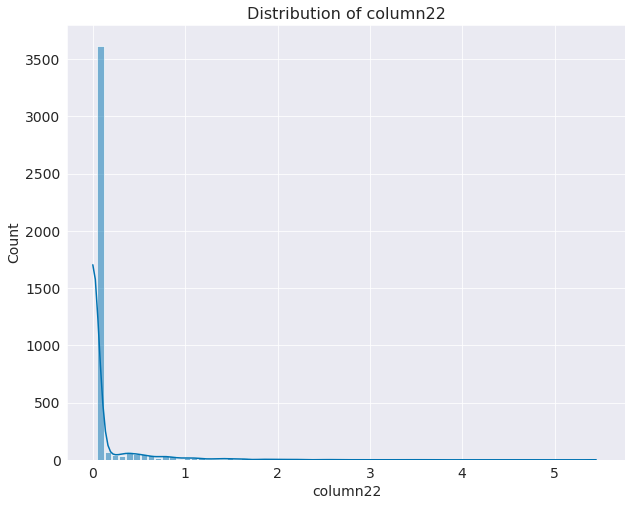



The skewness is: 5.858801276365386
The kurtosis is: 49.10801594925127
The coefficient of variation is: 3.4911856729780966
**************************************************





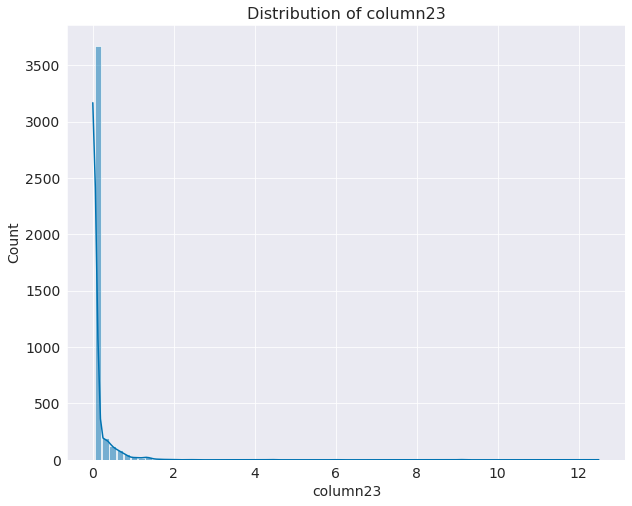



The skewness is: 15.554934027938502
The kurtosis is: 340.09847690676224
The coefficient of variation is: 4.745225283725404
**************************************************





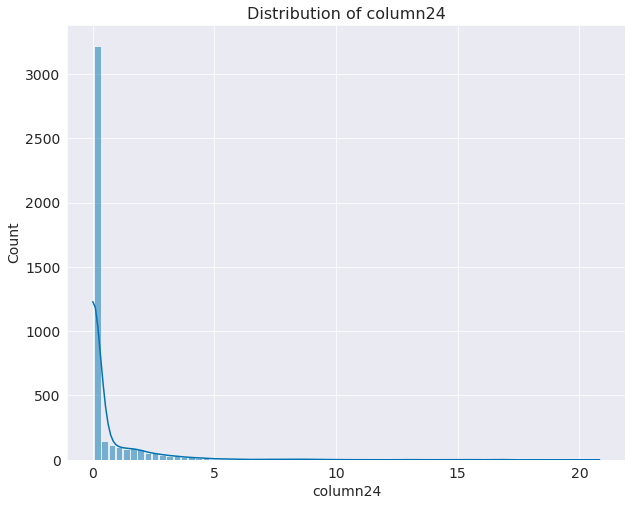



The skewness is: 5.638165816185381
The kurtosis is: 43.17222154314974
The coefficient of variation is: 2.920435859821532
**************************************************





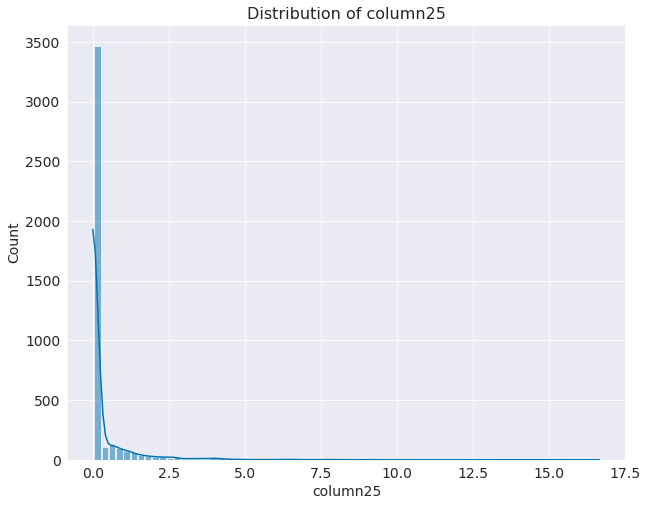



The skewness is: 6.296724614126465
The kurtosis is: 63.05833272589222
The coefficient of variation is: 3.241450208831313
**************************************************





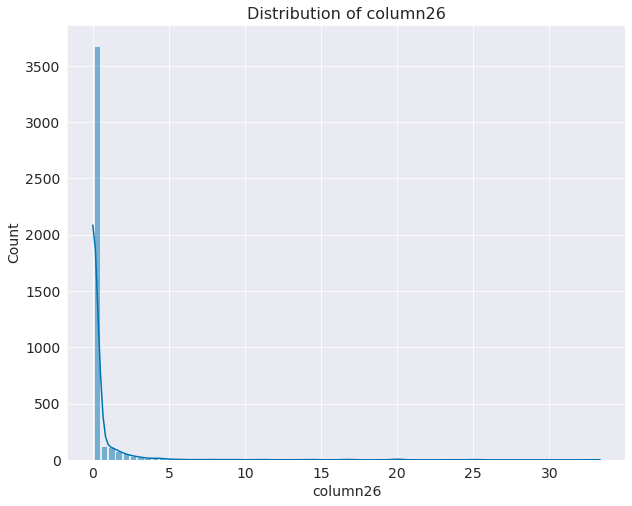



The skewness is: 9.480456731265532
The kurtosis is: 111.0732270127304
The coefficient of variation is: 4.799690746324192
**************************************************





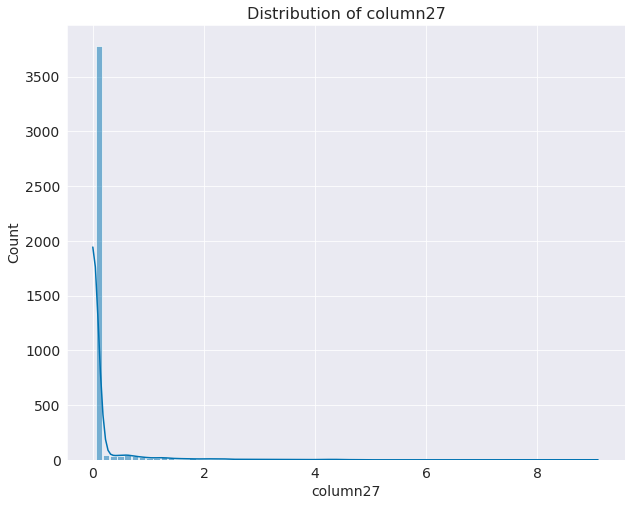



The skewness is: 6.517190462797073
The kurtosis is: 58.654816678441556
The coefficient of variation is: 4.1638176000856015
**************************************************





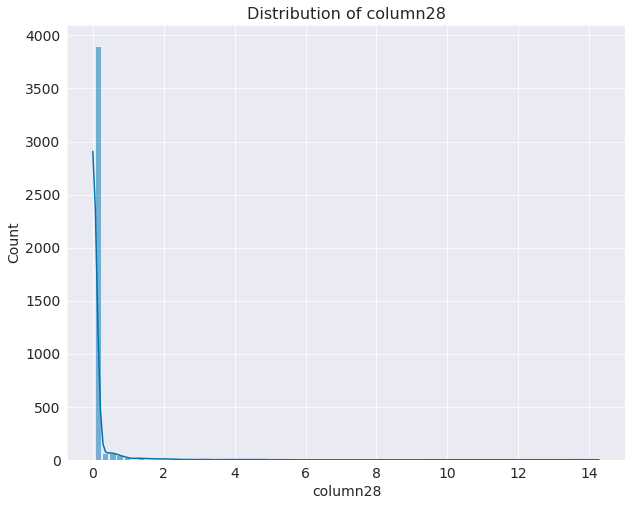



The skewness is: 11.682205248152457
The kurtosis is: 189.3637695858811
The coefficient of variation is: 5.862083020176771
**************************************************





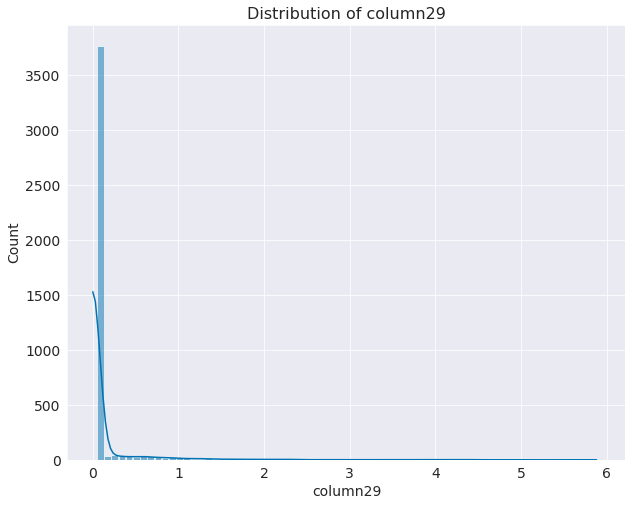



The skewness is: 6.3800351208083725
The kurtosis is: 49.092932840003456
The coefficient of variation is: 4.235085473060242
**************************************************





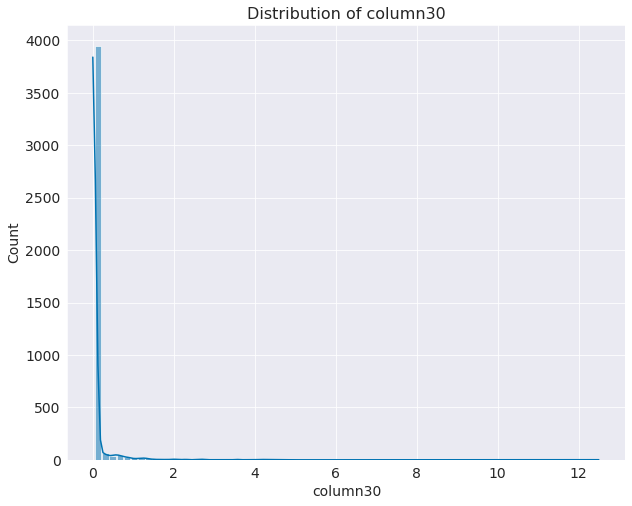



The skewness is: 13.51326200356011
The kurtosis is: 302.2992449145031
The coefficient of variation is: 6.093738443640745
**************************************************





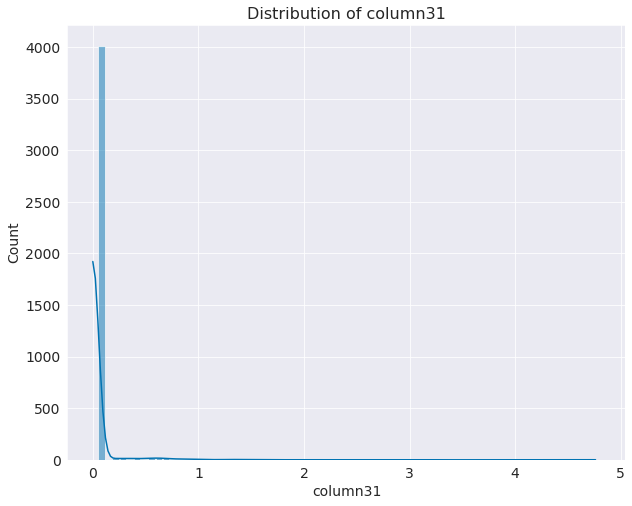



The skewness is: 10.431201701929531
The kurtosis is: 128.26453295271307
The coefficient of variation is: 6.694850097824585
**************************************************





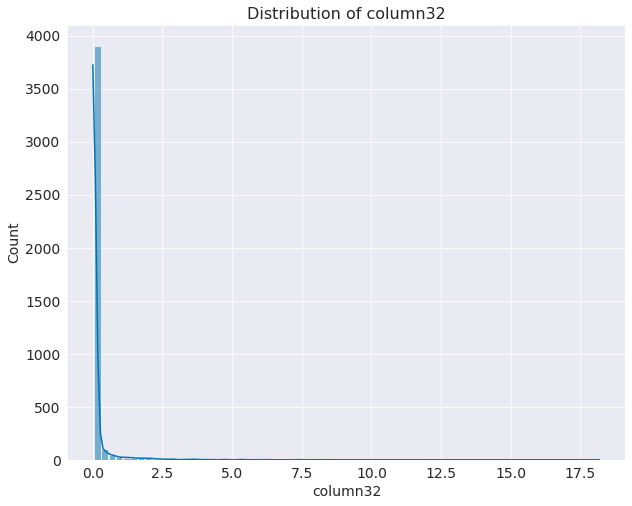



The skewness is: 13.067827281270091
The kurtosis is: 290.6688094541424
The coefficient of variation is: 5.561045362361053
**************************************************





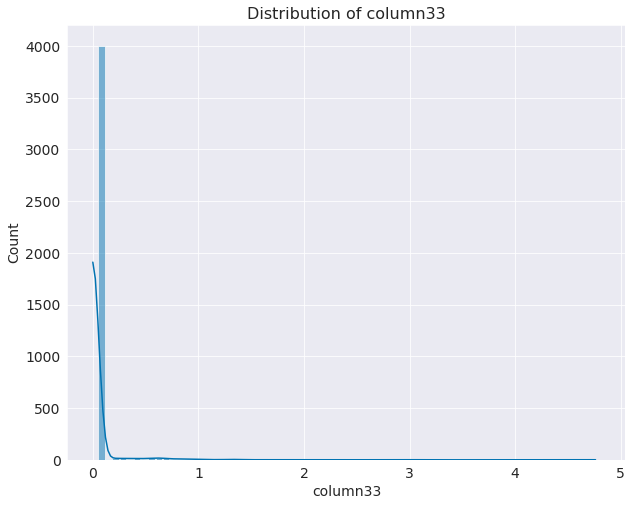



The skewness is: 10.33858826338098
The kurtosis is: 126.40636347330128
The coefficient of variation is: 6.592333999455393
**************************************************





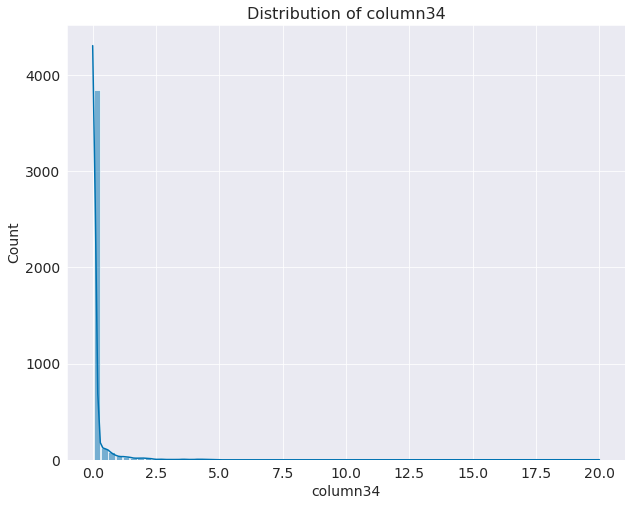



The skewness is: 15.999956132156065
The kurtosis is: 491.43093386031177
The coefficient of variation is: 4.914638121461937
**************************************************





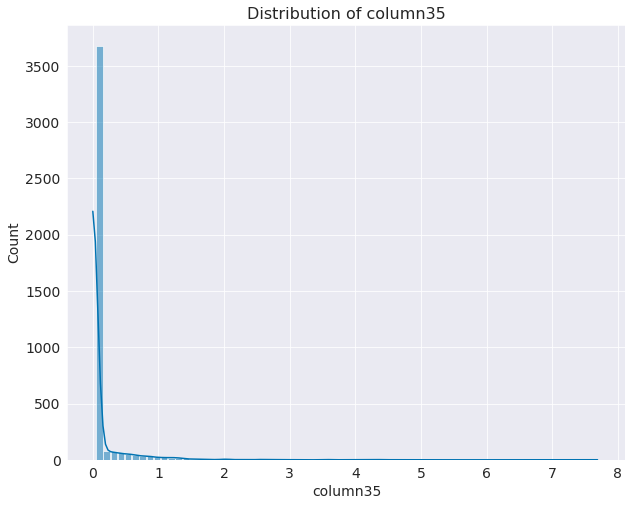



The skewness is: 7.357896025991279
The kurtosis is: 79.96916117040796
The coefficient of variation is: 3.888783756624135
**************************************************





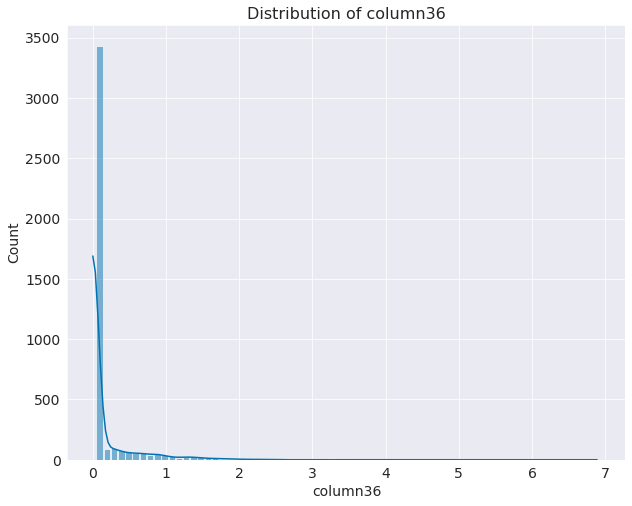



The skewness is: 5.125988952329249
The kurtosis is: 40.87828274191303
The coefficient of variation is: 2.958220331226978
**************************************************





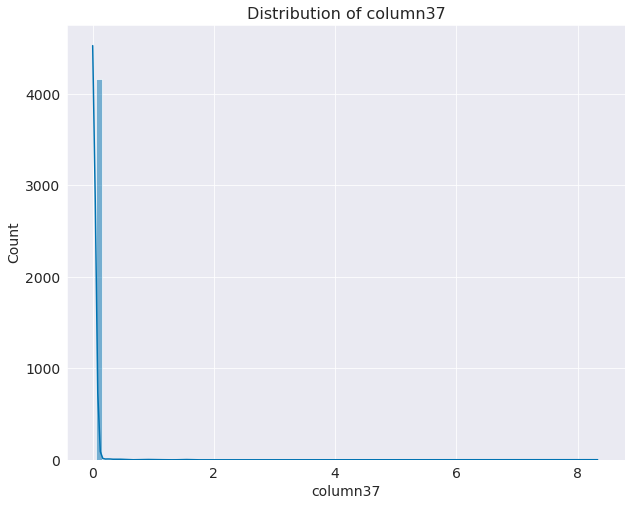



The skewness is: 27.075472865634797
The kurtosis is: 836.0300922125258
The coefficient of variation is: 16.242715203740772
**************************************************





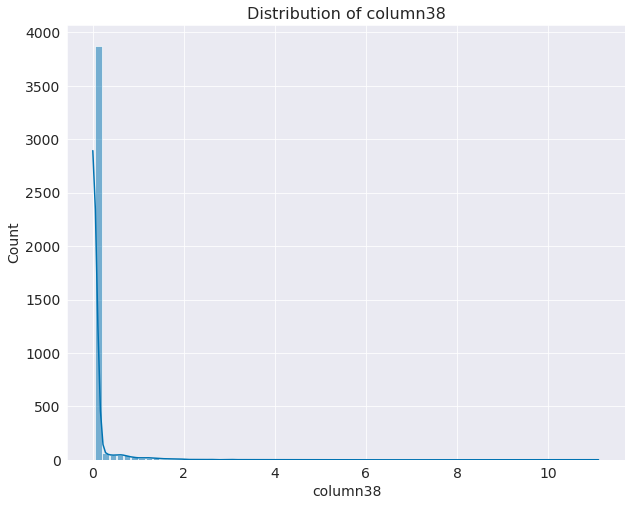



The skewness is: 11.76092280888129
The kurtosis is: 205.9110188483097
The coefficient of variation is: 5.3289569430998895
**************************************************





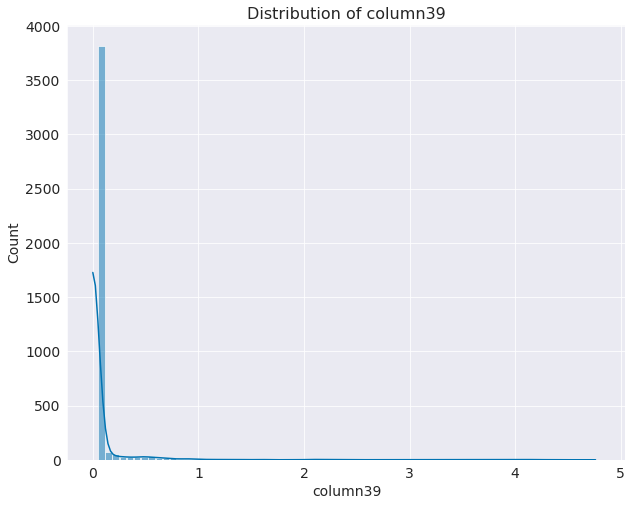



The skewness is: 9.100750796300309
The kurtosis is: 101.09561504479268
The coefficient of variation is: 5.2136324583515785
**************************************************





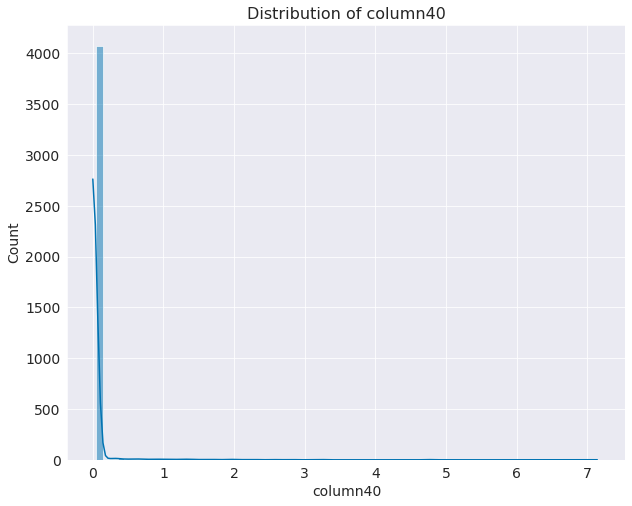



The skewness is: 11.46742143568298
The kurtosis is: 166.22147983619047
The coefficient of variation is: 7.678518830546612
**************************************************





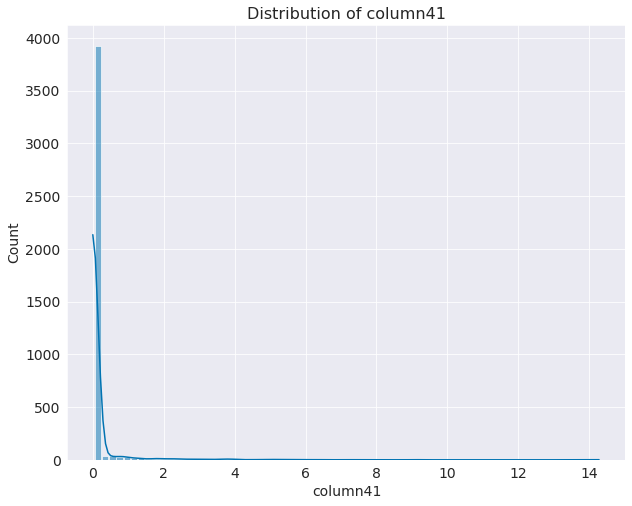



The skewness is: 9.184045478757882
The kurtosis is: 108.96821467263001
The coefficient of variation is: 5.6075840782025095
**************************************************





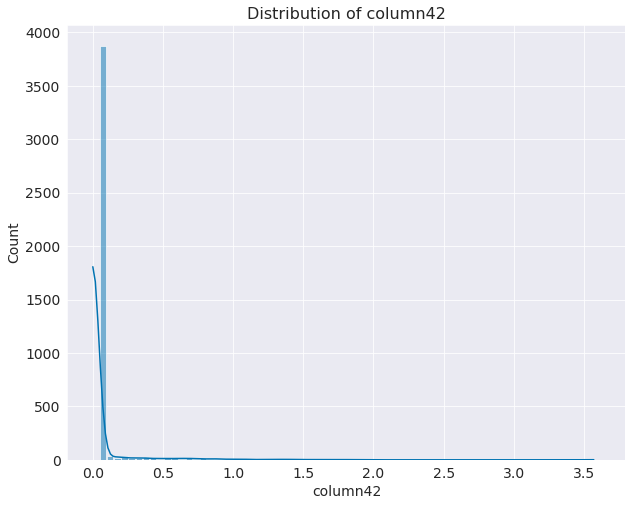



The skewness is: 7.407315969939165
The kurtosis is: 73.77728814525744
The coefficient of variation is: 4.753602277685048
**************************************************





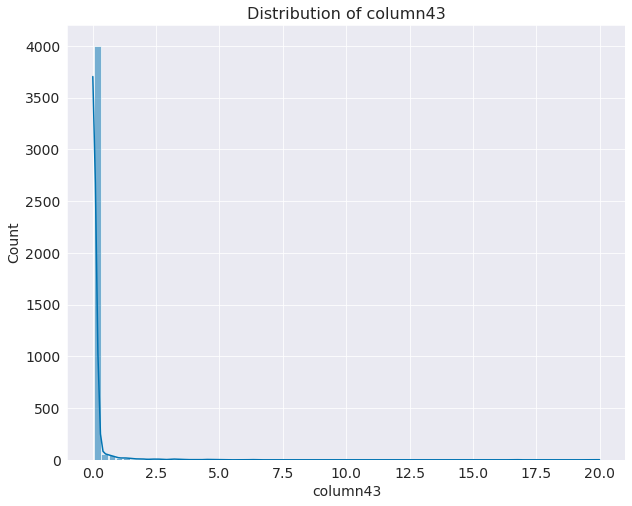



The skewness is: 18.19468341518208
The kurtosis is: 448.9119327399211
The coefficient of variation is: 7.5764977597283805
**************************************************





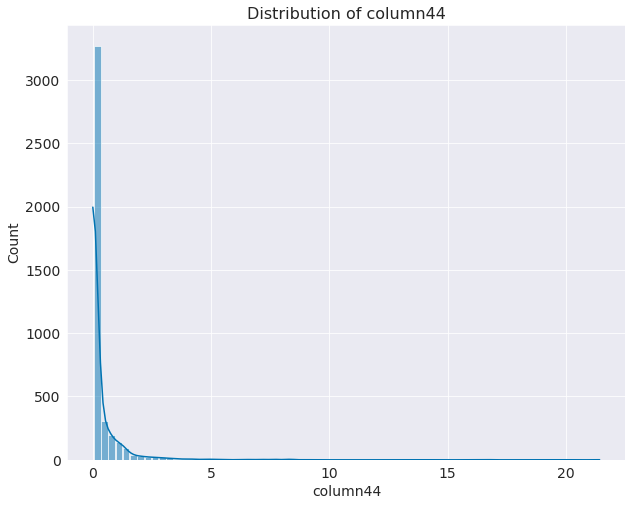



The skewness is: 8.916894408267837
The kurtosis is: 122.04081905490409
The coefficient of variation is: 3.266797069545998
**************************************************





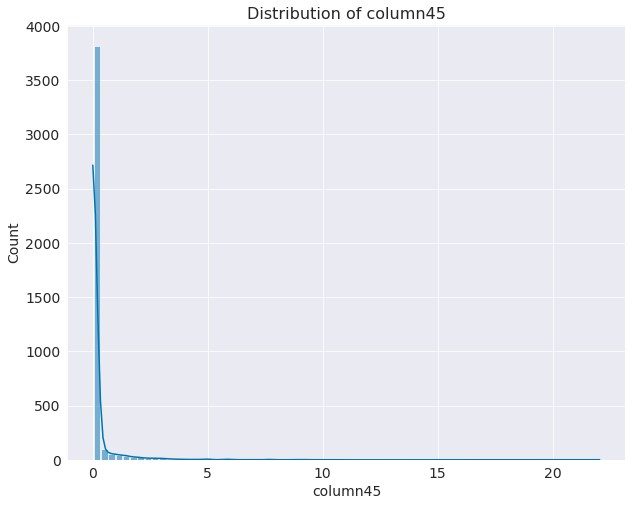



The skewness is: 10.075844485986625
The kurtosis is: 150.08428520682781
The coefficient of variation is: 4.901341042880572
**************************************************





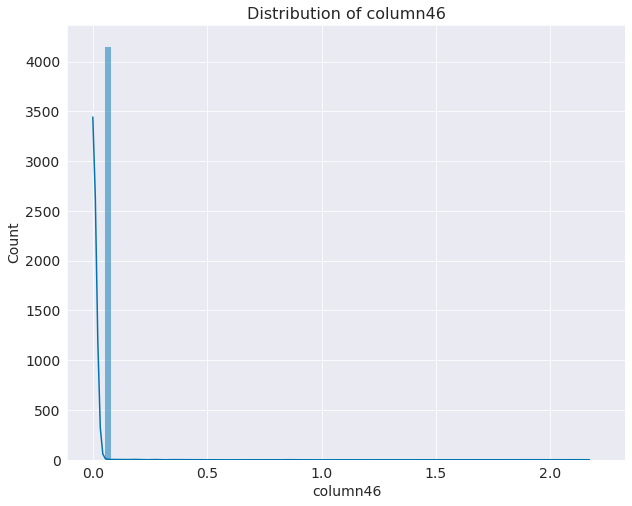



The skewness is: 19.2961793010683
The kurtosis is: 431.20596835300984
The coefficient of variation is: 13.680945228043173
**************************************************





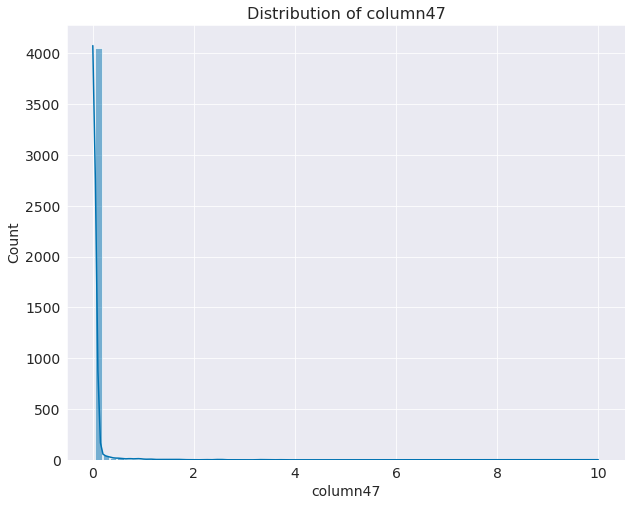



The skewness is: 18.86952534245681
The kurtosis is: 492.03057055378207
The coefficient of variation is: 8.59052879058812
**************************************************





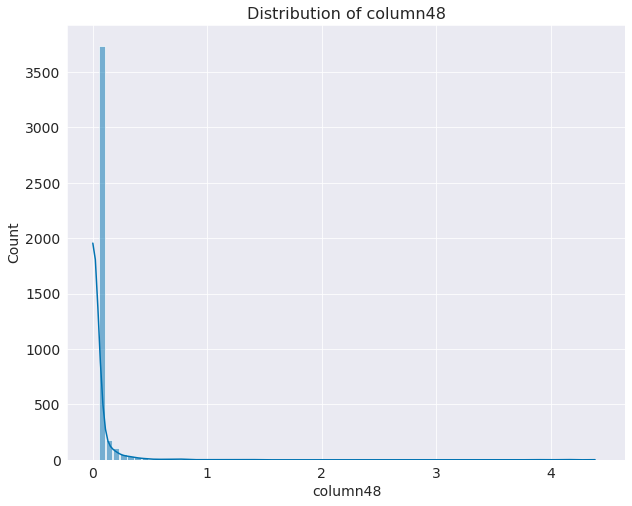



The skewness is: 13.354308771684865
The kurtosis is: 200.4019598880746
The coefficient of variation is: 6.249574285370423
**************************************************





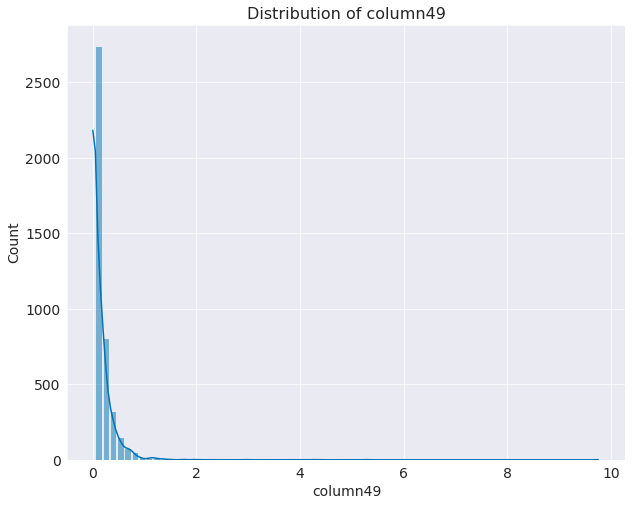



The skewness is: 14.002040451872888
The kurtosis is: 404.31988190120626
The coefficient of variation is: 1.903632863175018
**************************************************





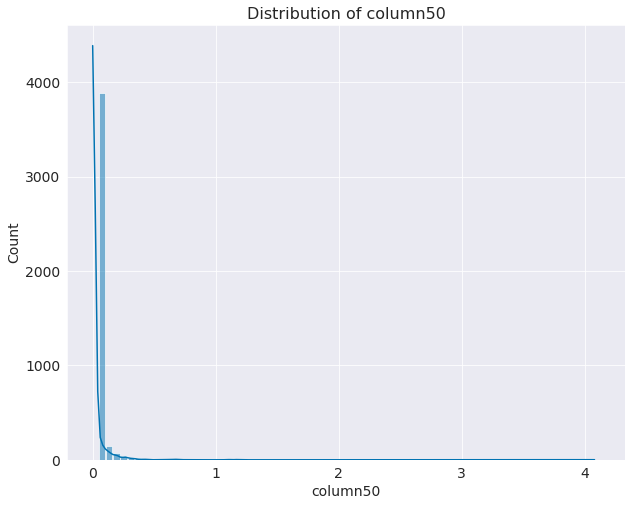



The skewness is: 21.269545823121554
The kurtosis is: 664.4672294373212
The coefficient of variation is: 6.084034736211059
**************************************************





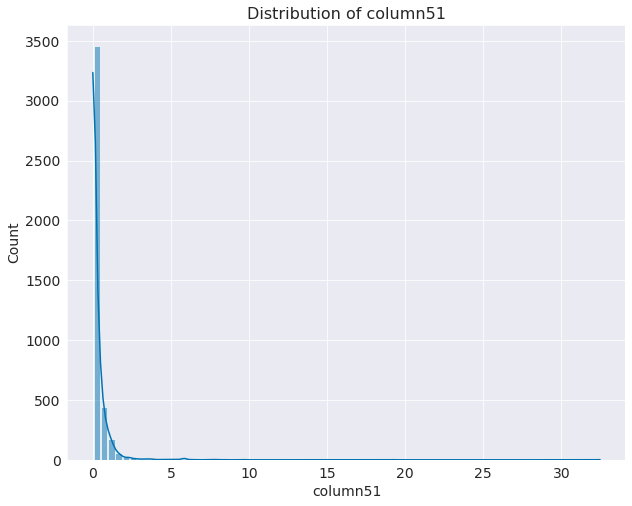



The skewness is: 18.33774187328914
The kurtosis is: 579.4066112511405
The coefficient of variation is: 3.0011885219132957
**************************************************





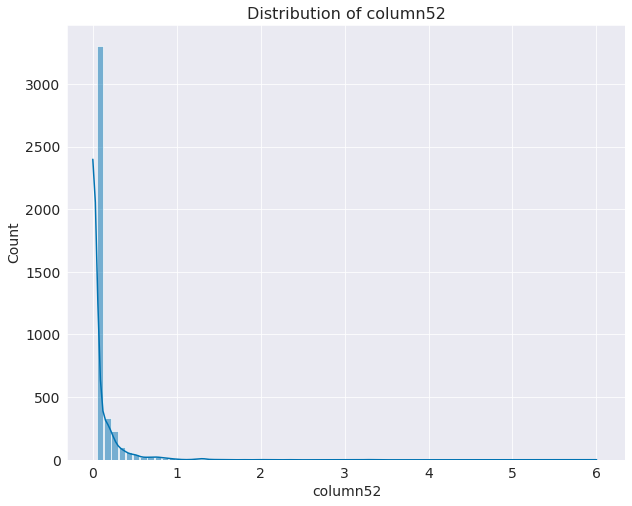



The skewness is: 10.607872466154685
The kurtosis is: 188.42322252701322
The coefficient of variation is: 3.1513022758225544
**************************************************





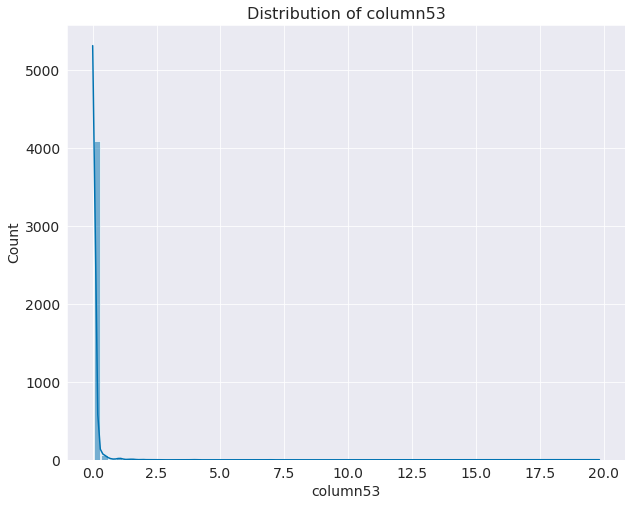



The skewness is: 31.49649074032501
The kurtosis is: 1238.0298797166927
The coefficient of variation is: 9.517354349489281
**************************************************





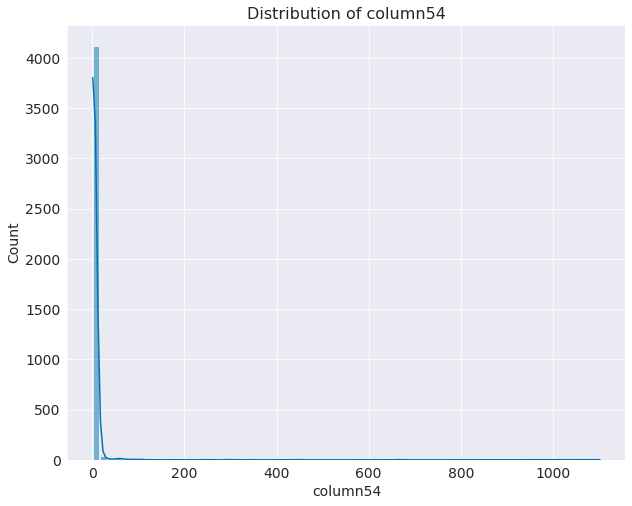



The skewness is: 22.7579382375804
The kurtosis is: 614.2530520860278
The coefficient of variation is: 6.1570482718804165
**************************************************





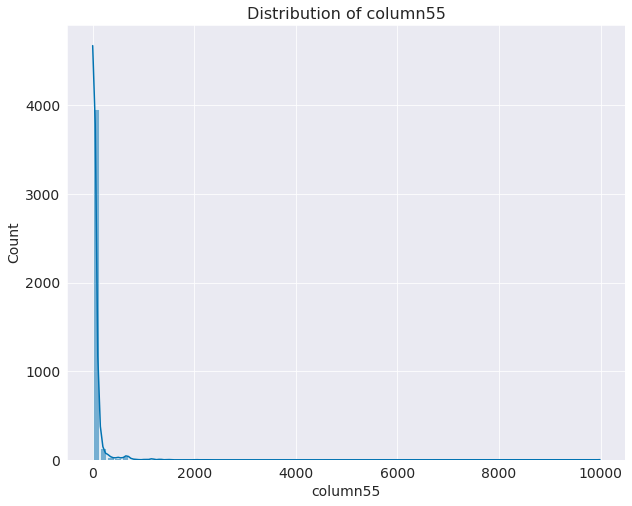



The skewness is: 31.20184493050893
The kurtosis is: 1470.8685528390386
The coefficient of variation is: 3.8284284047598454
**************************************************





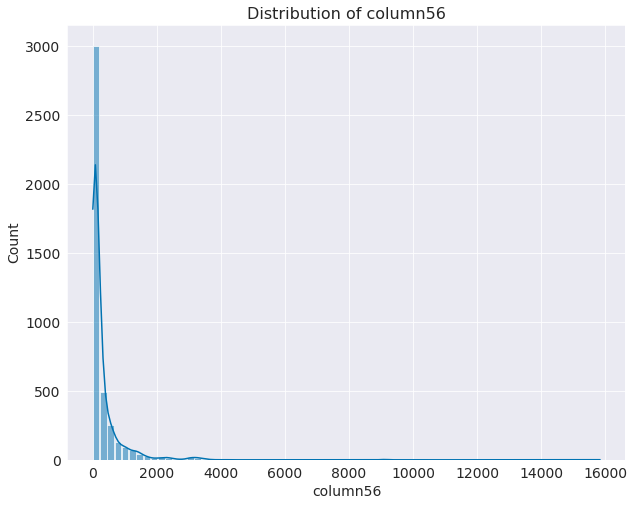



The skewness is: 8.800582586623186
The kurtosis is: 146.07290567147433
The coefficient of variation is: 2.124862685050366
**************************************************





In [20]:
# Checking the distribution of the other columns

for i in feat:
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = i, data=spam,  bins = 70 , shrink= 0.9, kde = True)
  plt.title('Distribution of {}'.format(i), fontsize = 16)
  plt.xlabel(i, fontsize = 14)
  plt.ylabel('Count', fontsize = 14)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()
  print('\n')
  variation(i)
  print('*'*50)
  print('\n'+'\n')

From the graphs above the following observations can be made:

* There is high variation in the values of each of the features.
* The distribution of each of the features is leptokurtic
* The distribution of each of the features is right skewed which suggests the presence of outliers

### b) Bivariate Analysis

In [21]:
# Preview of the coluns

spam.columns

Index(['column0', 'column1', 'column2', 'column3', 'column4', 'column5',
       'column6', 'column7', 'column8', 'column9', 'column10', 'column11',
       'column12', 'column13', 'column14', 'column15', 'column16', 'column17',
       'column18', 'column19', 'column20', 'column21', 'column22', 'column23',
       'column24', 'column25', 'column26', 'column27', 'column28', 'column29',
       'column30', 'column31', 'column32', 'column33', 'column34', 'column35',
       'column36', 'column37', 'column38', 'column39', 'column40', 'column41',
       'column42', 'column43', 'column44', 'column45', 'column46', 'column47',
       'column48', 'column49', 'column50', 'column51', 'column52', 'column53',
       'column54', 'column55', 'column56', 'mail'],
      dtype='object')

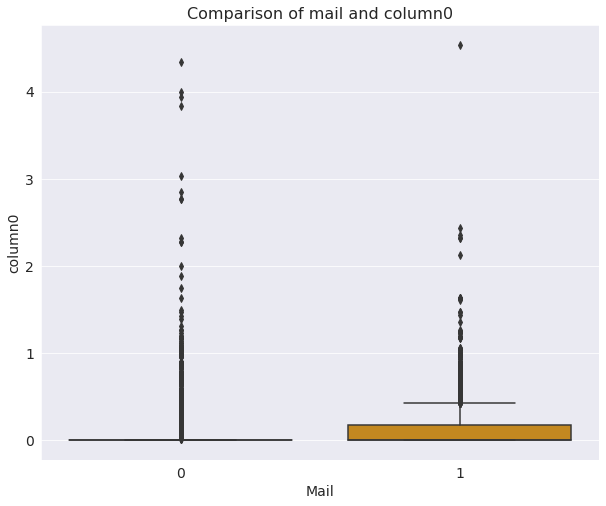

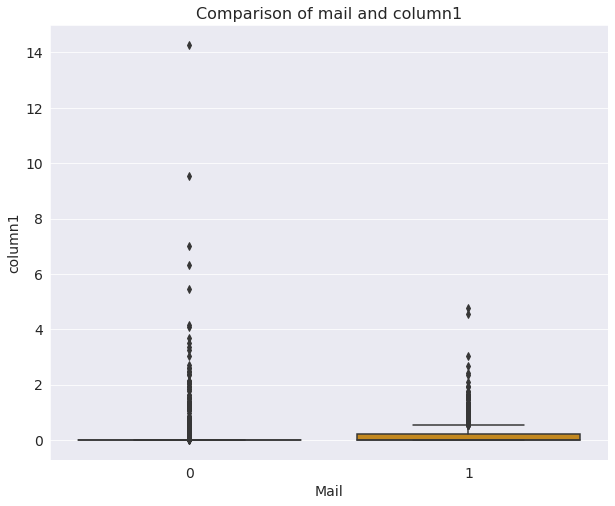

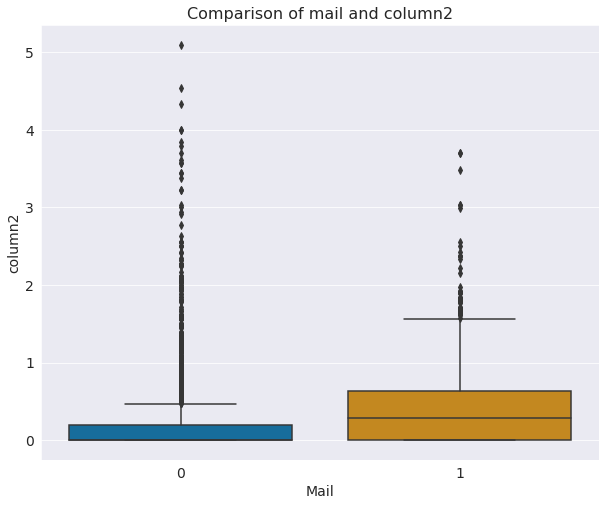

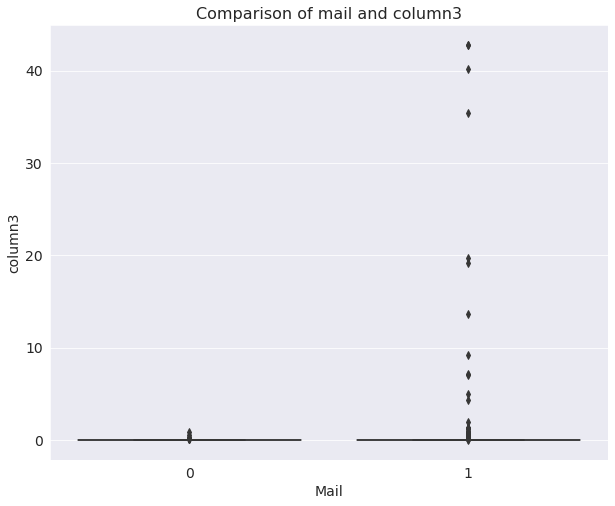

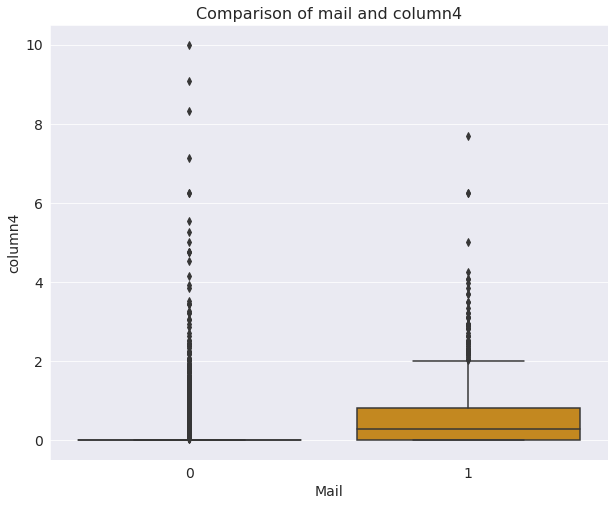

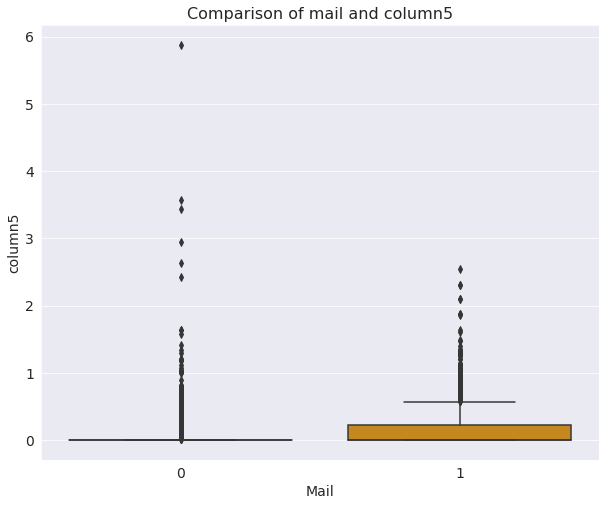

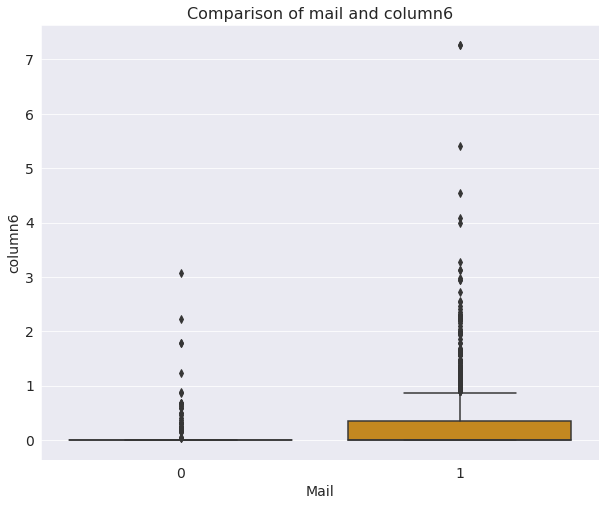

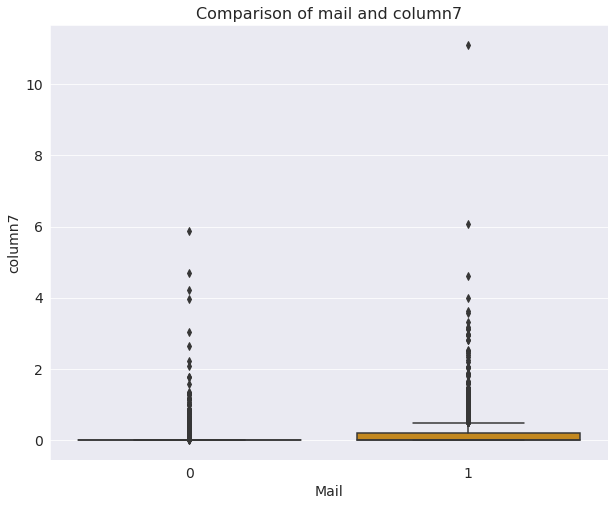

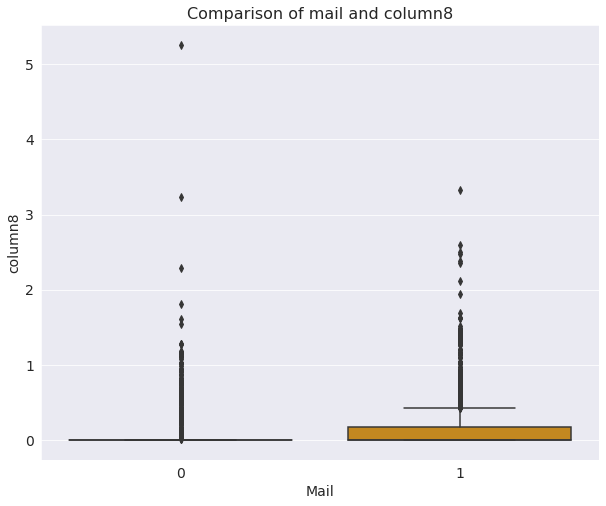

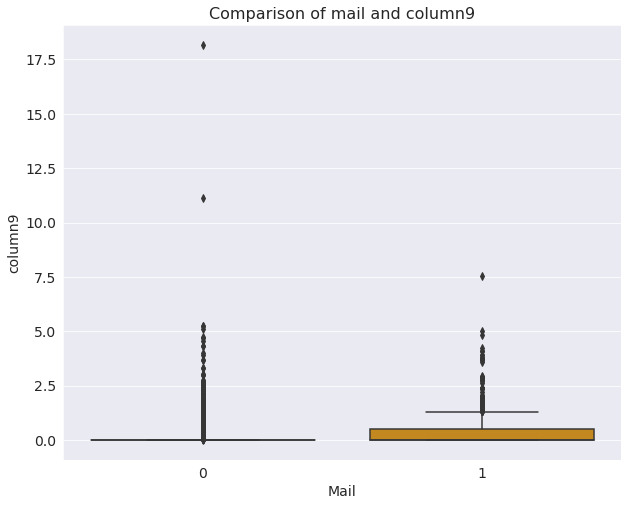

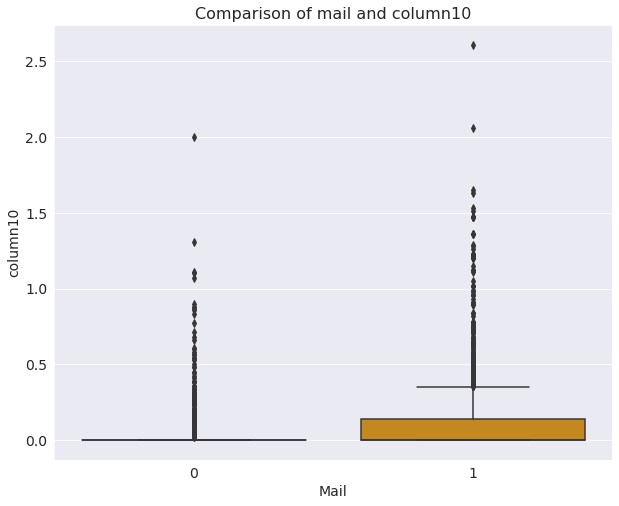

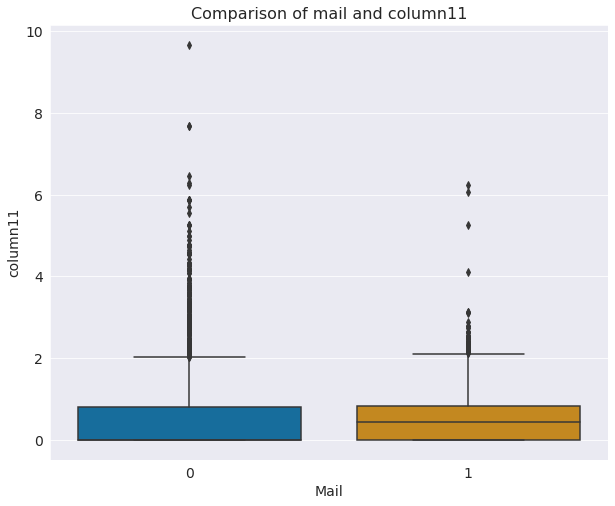

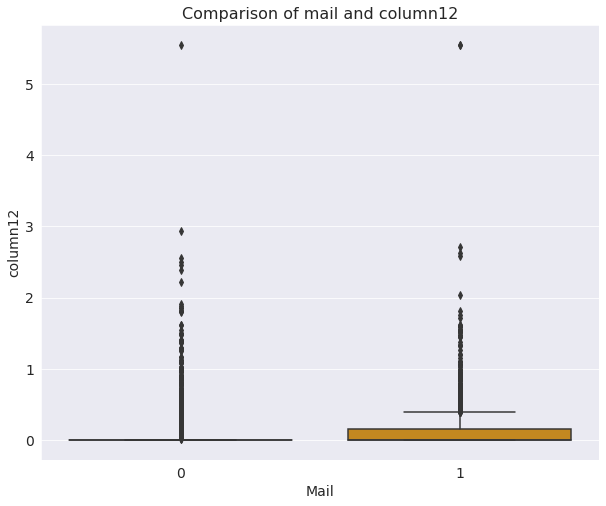

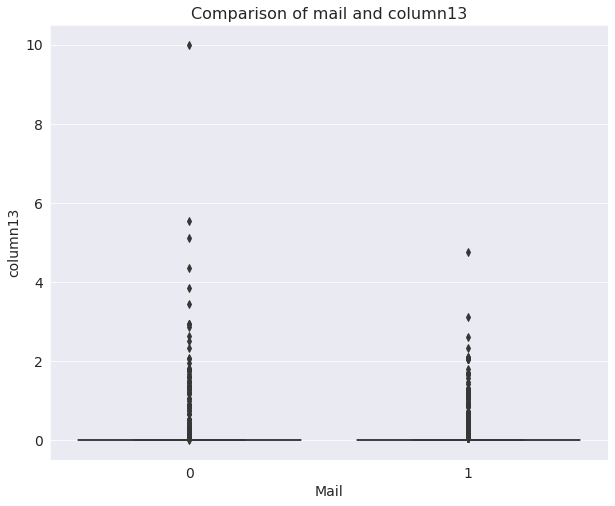

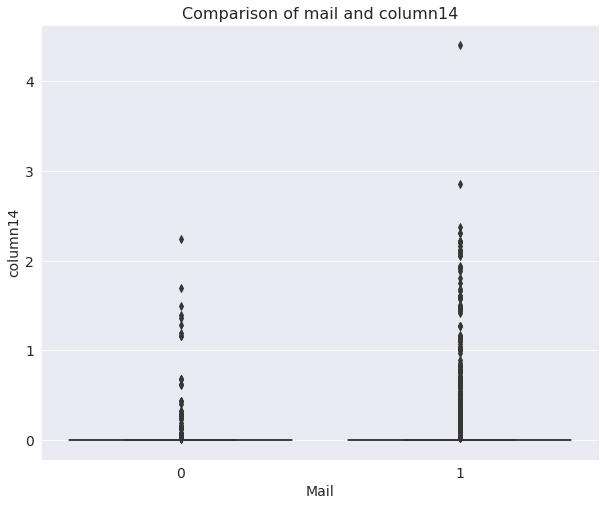

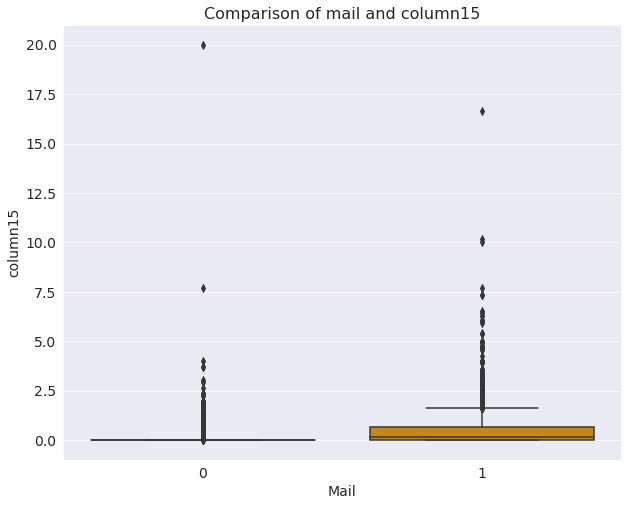

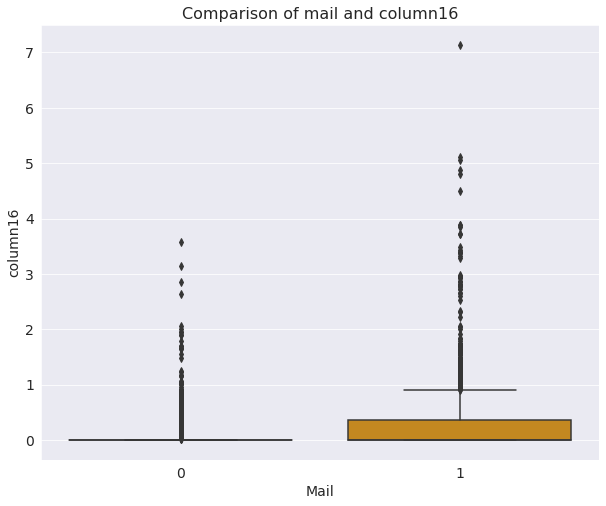

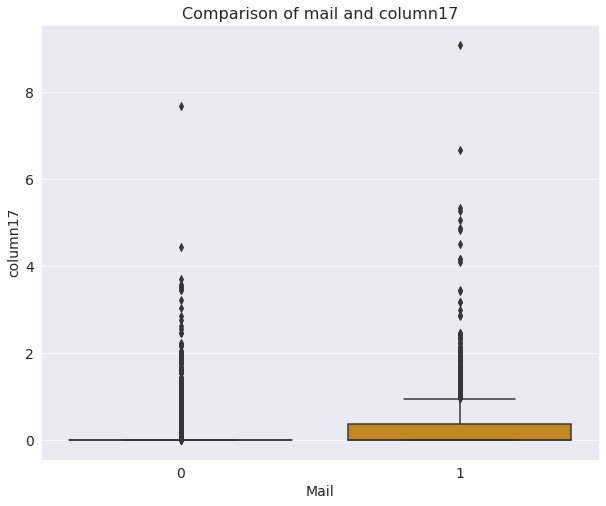

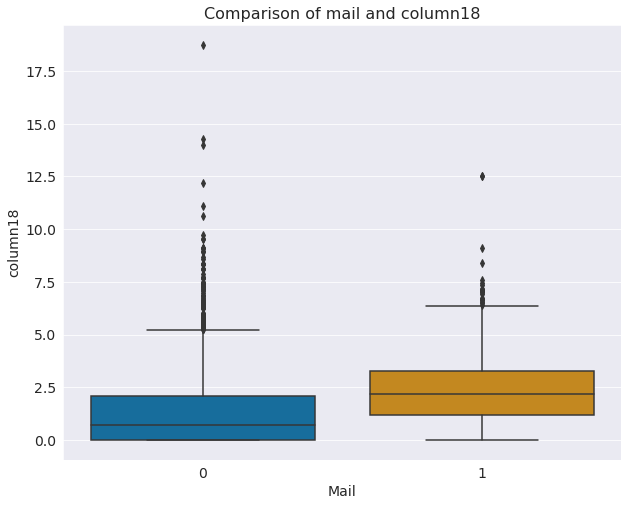

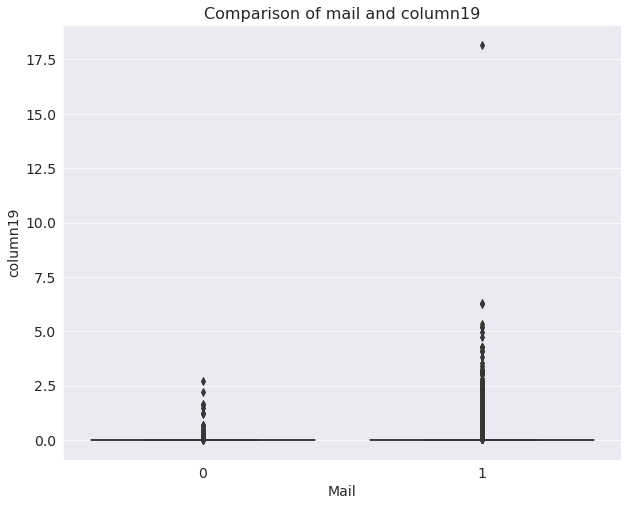

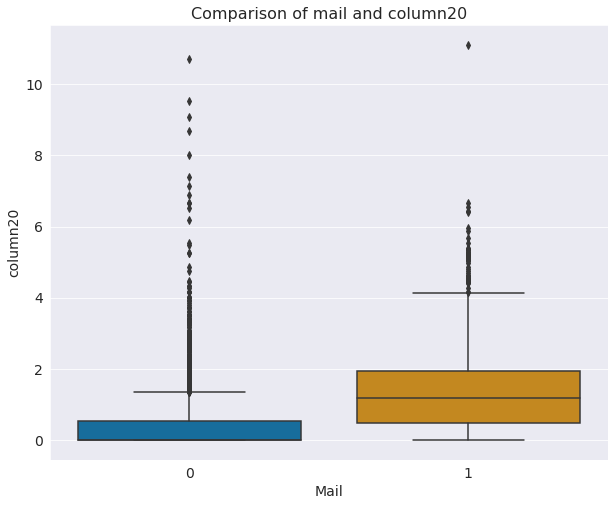

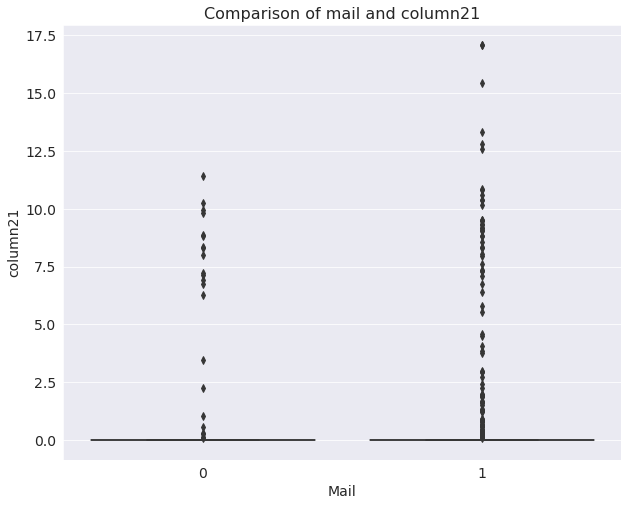

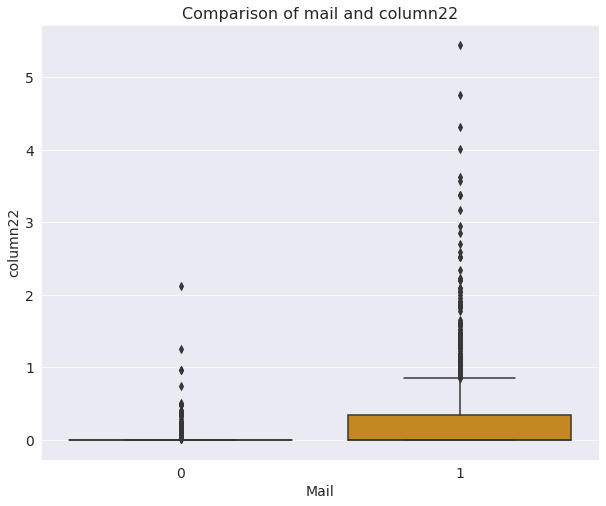

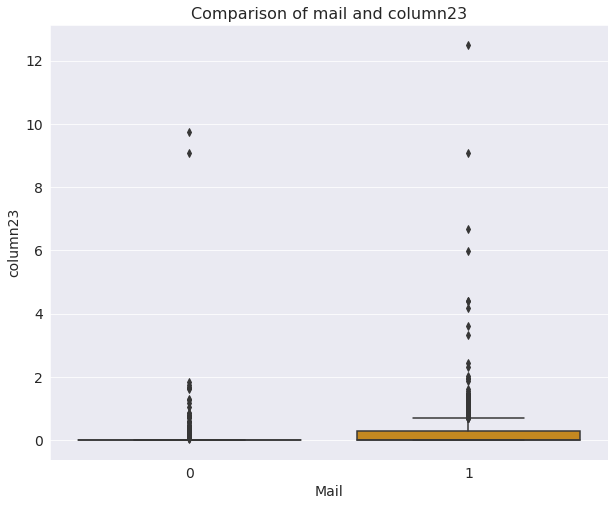

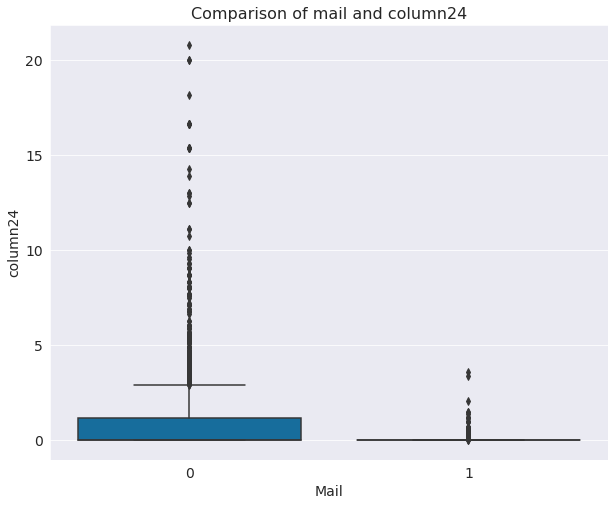

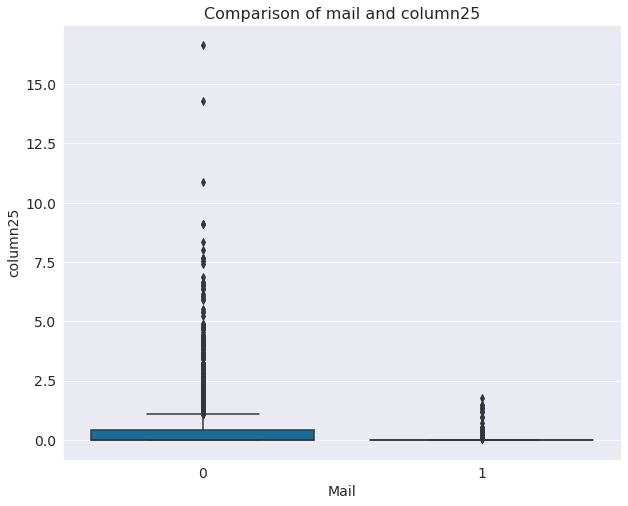

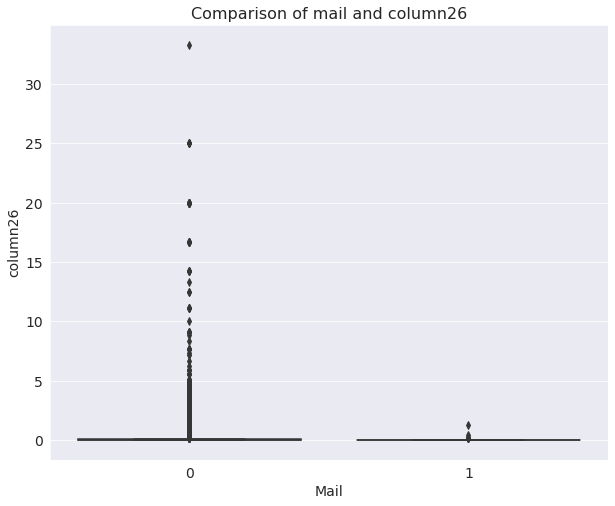

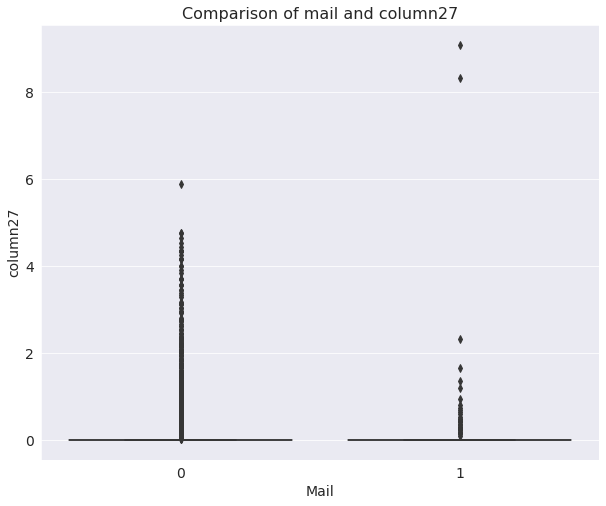

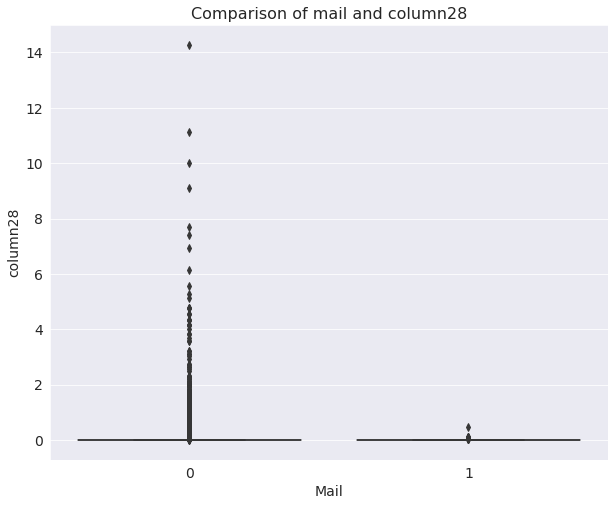

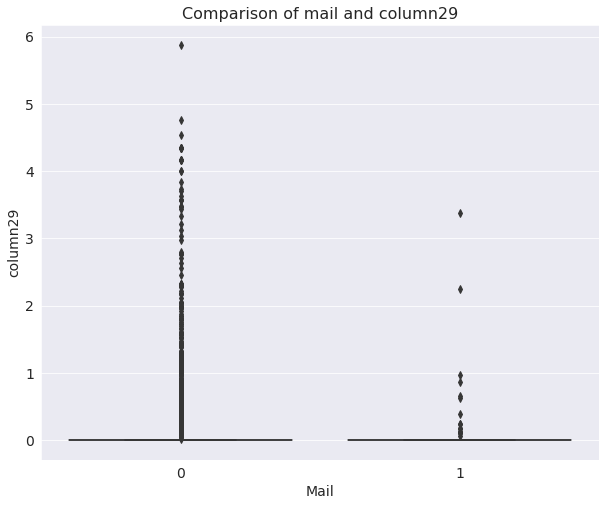

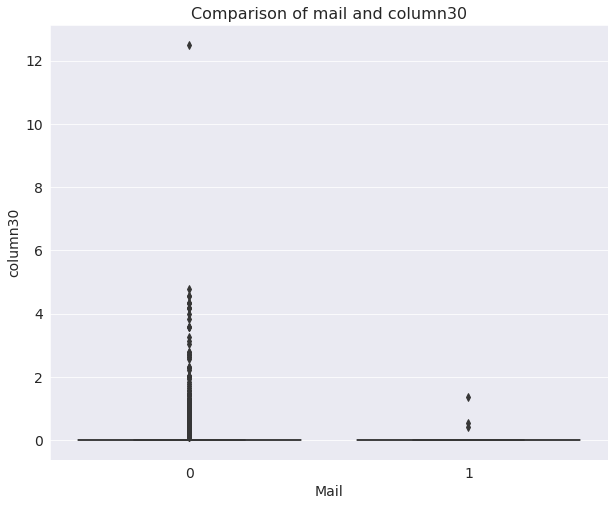

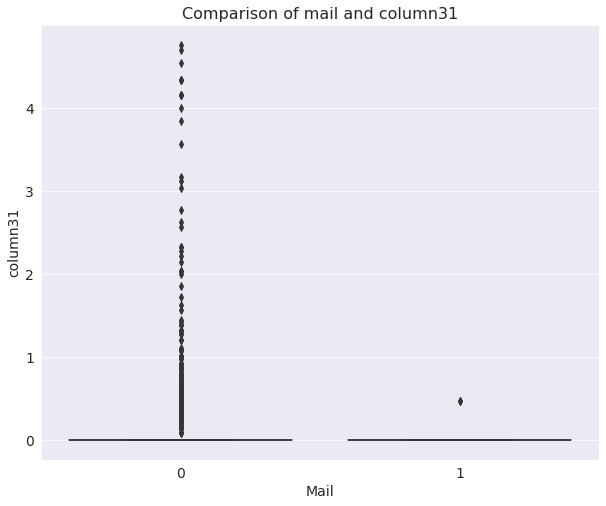

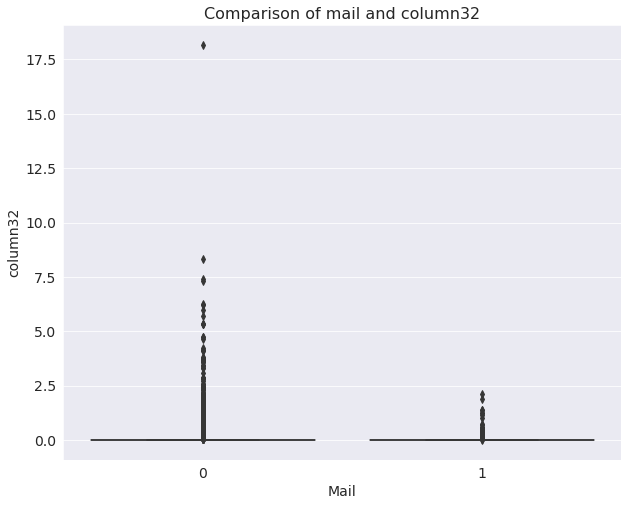

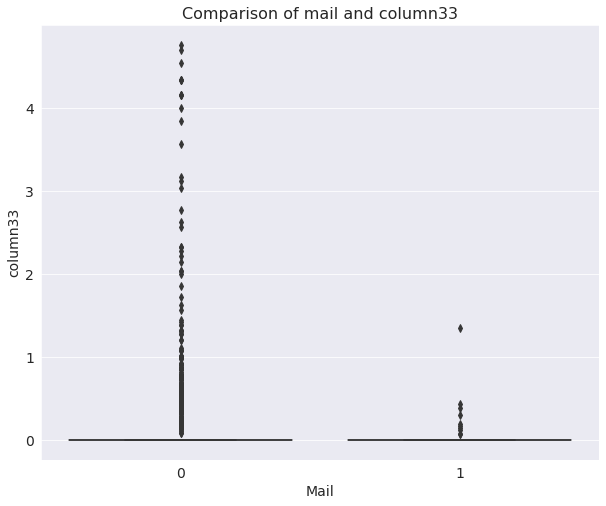

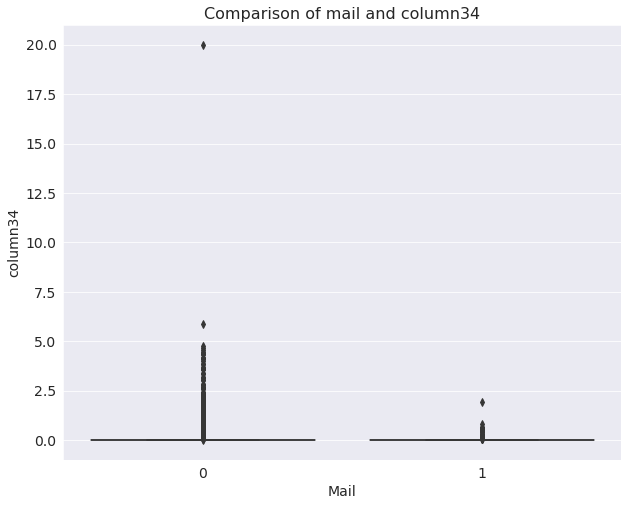

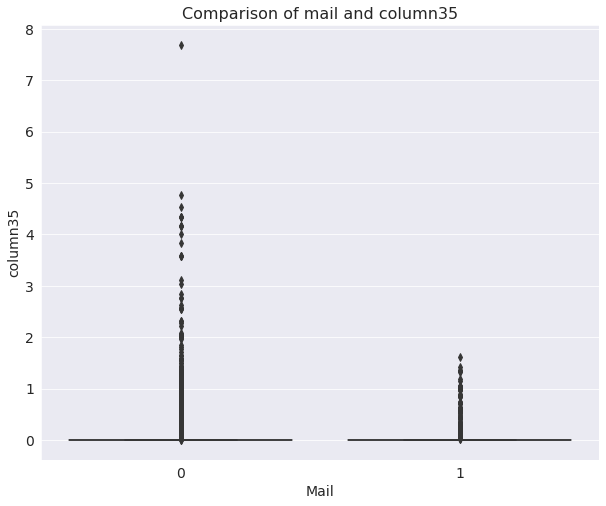

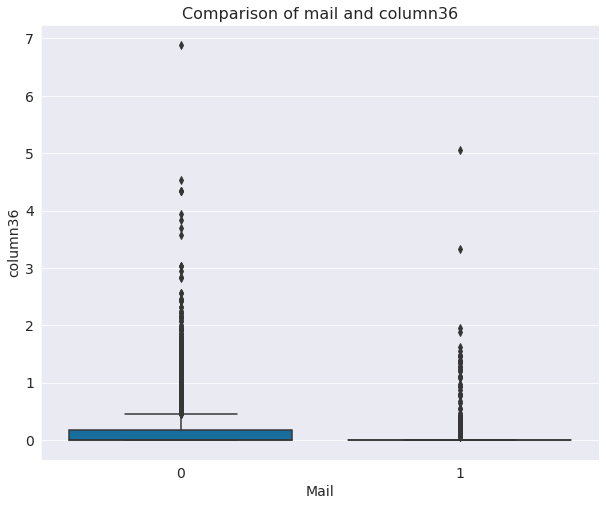

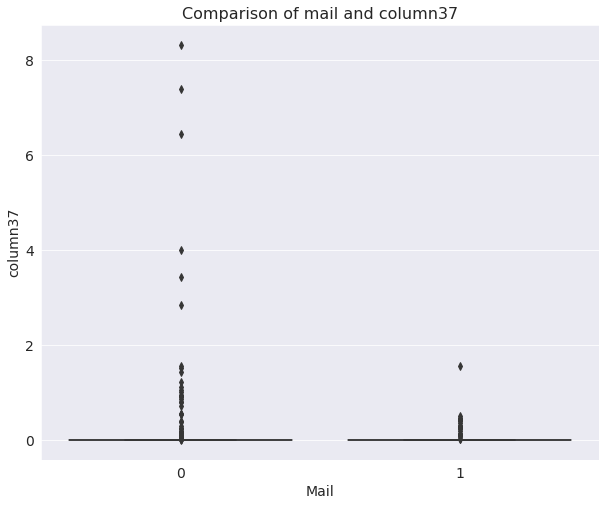

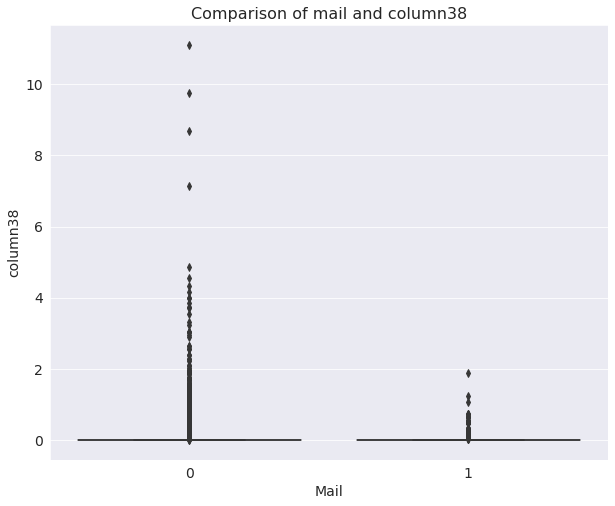

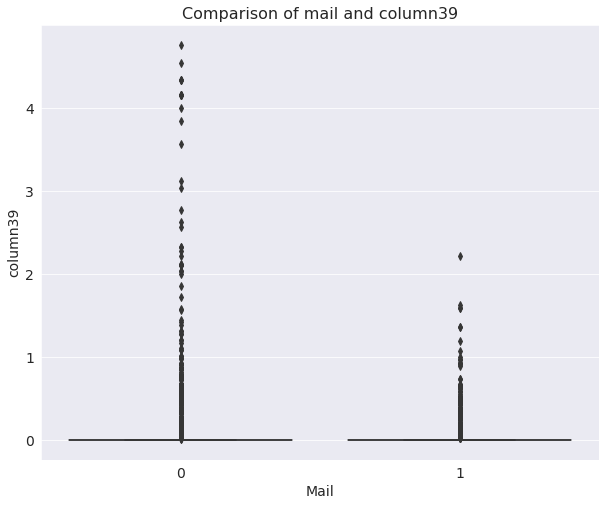

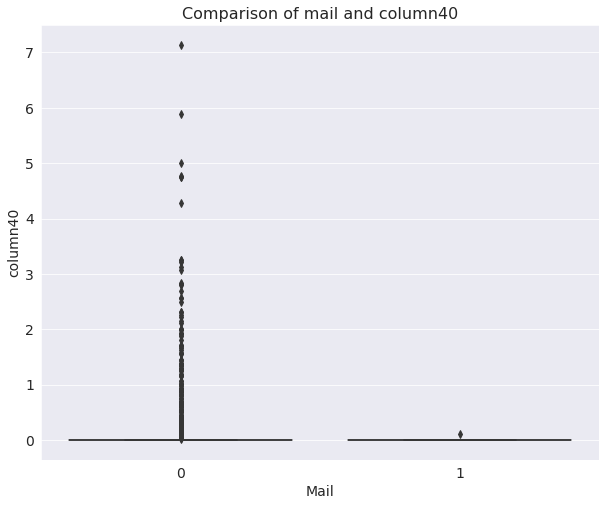

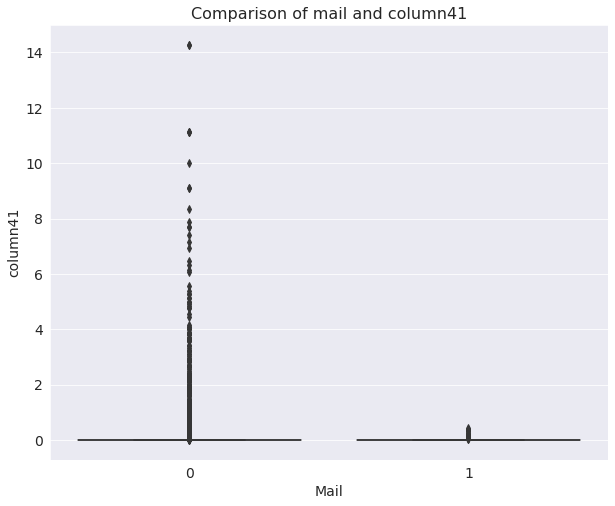

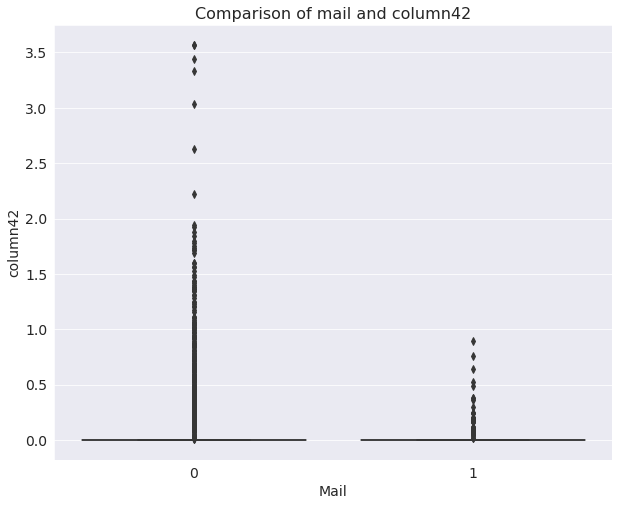

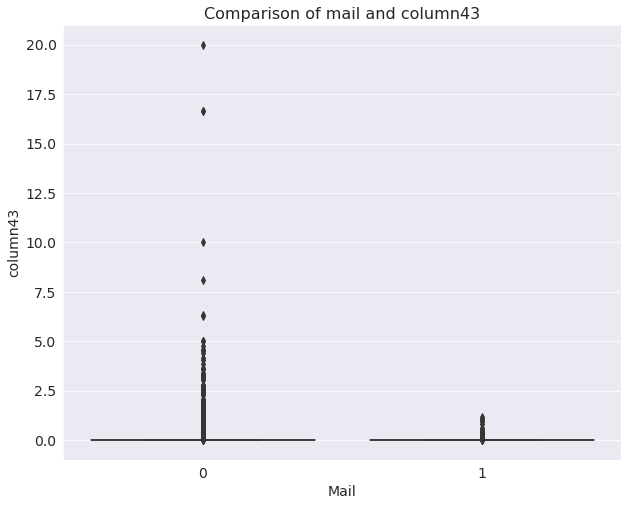

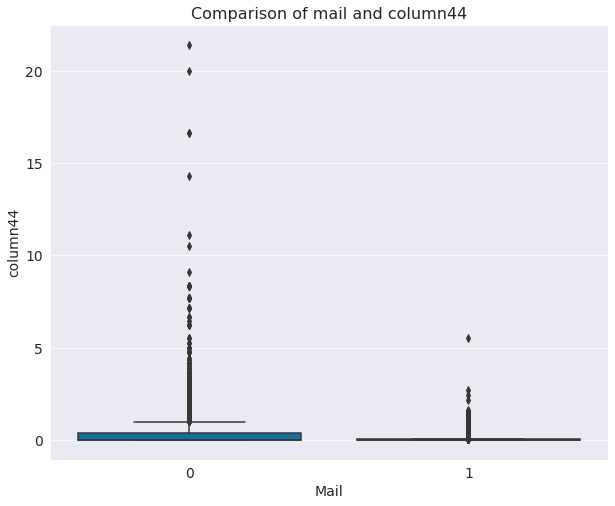

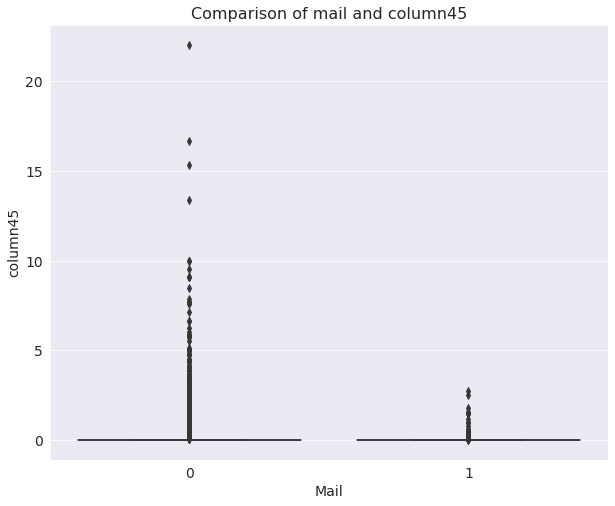

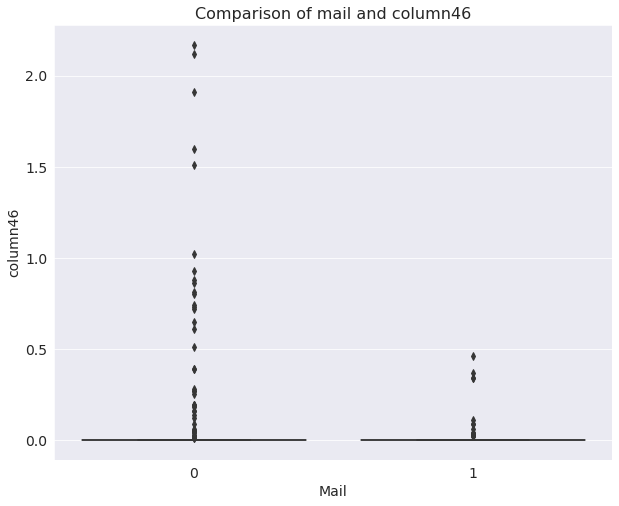

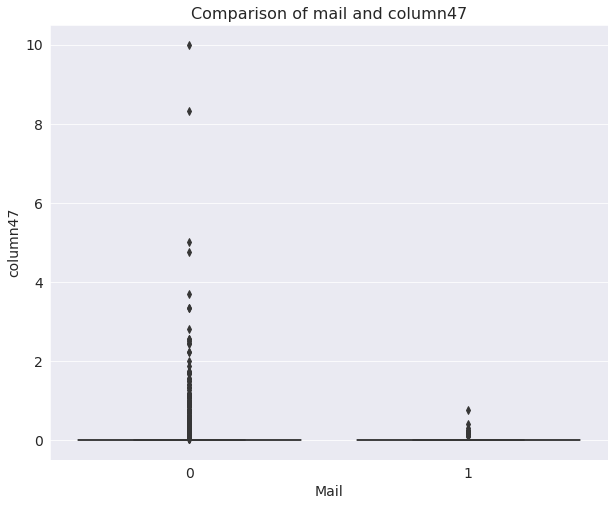

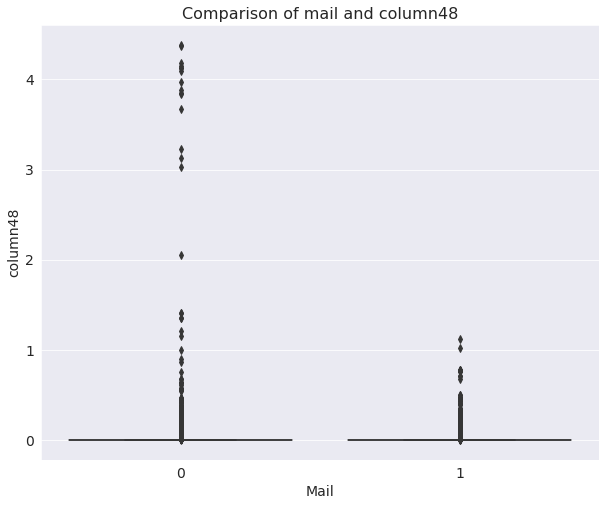

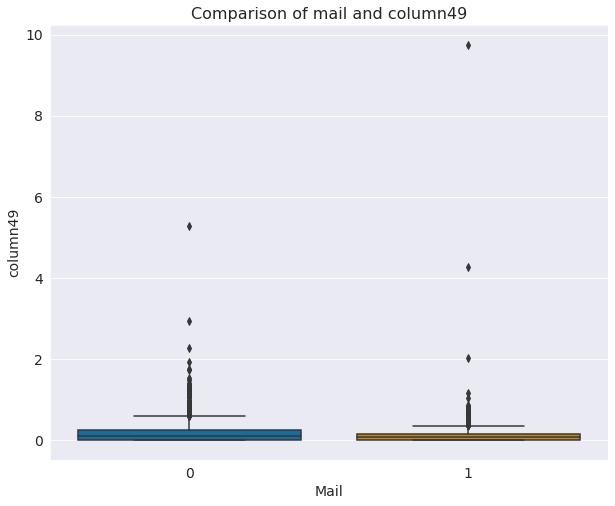

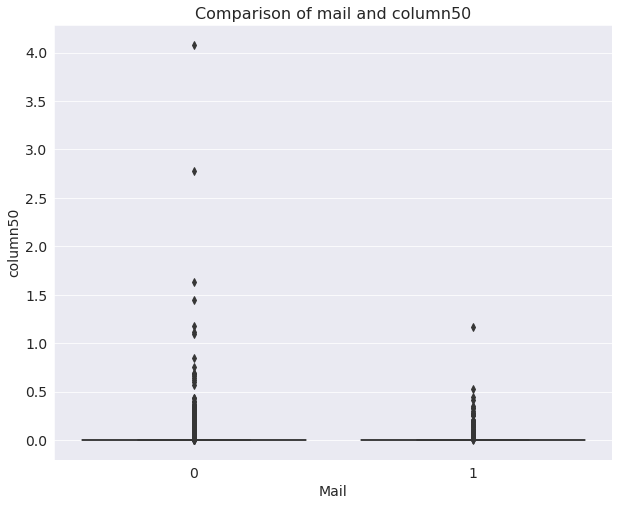

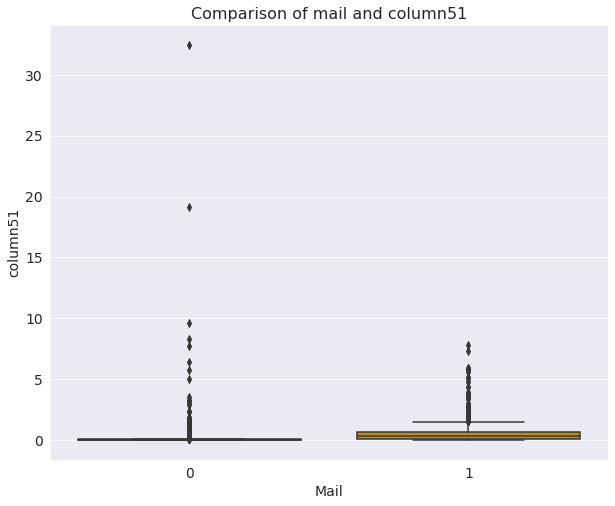

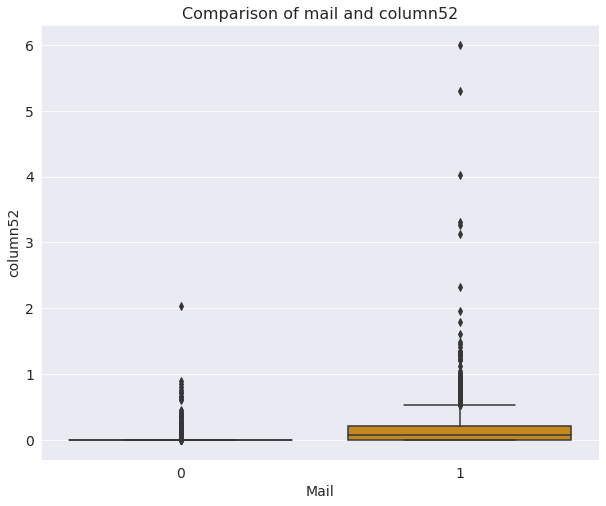

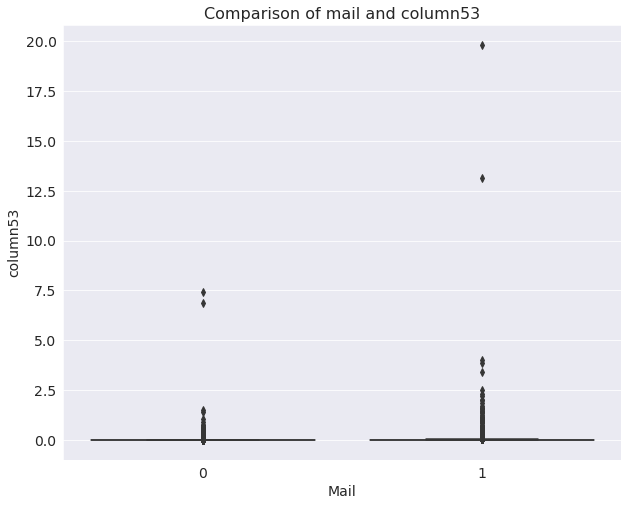

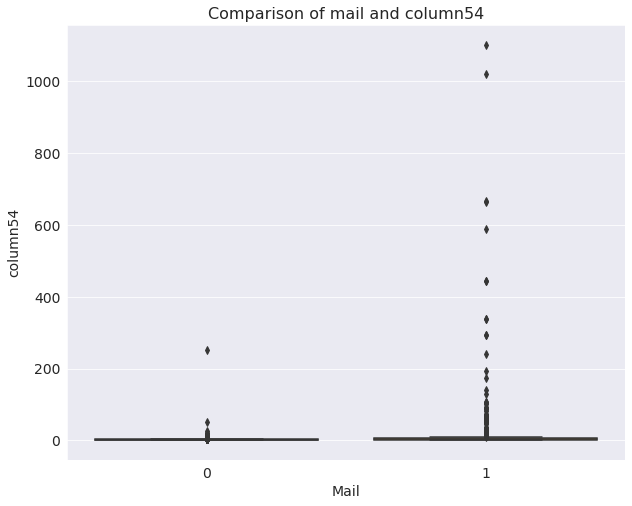

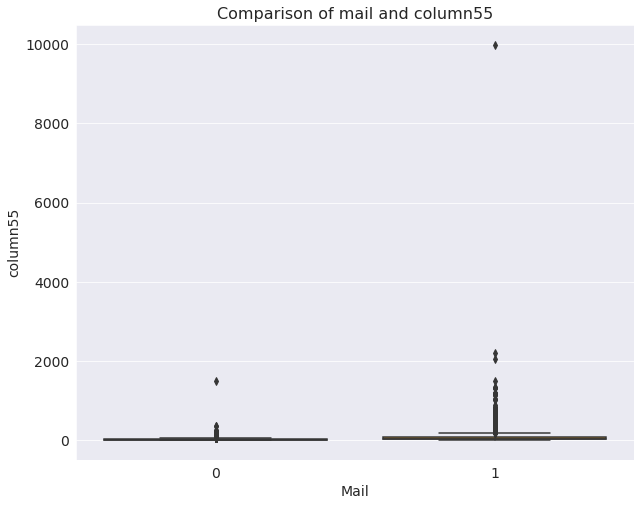

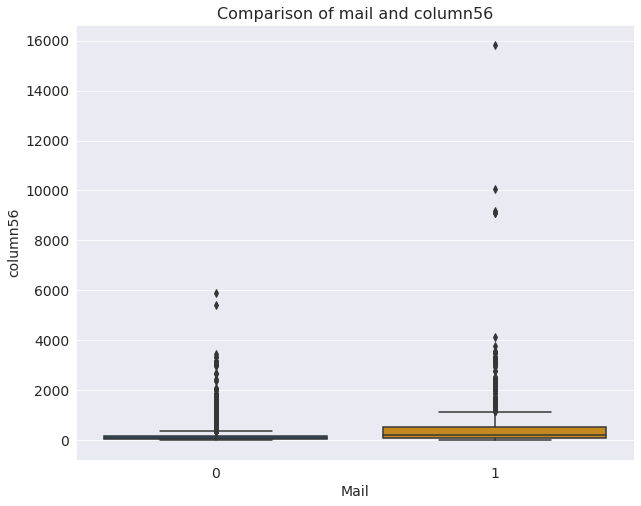

In [22]:
# Comparing mail vs the rest of the columns

for i in feat:
  plt.figure(figsize=(10,8))
  sns.boxplot(x = spam['mail'], y= spam[i])
  plt.title('Comparison of mail and {}'.format(i), fontsize = 16)
  plt.xlabel('Mail', fontsize = 14)
  plt.ylabel(i, fontsize = 14)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()


There are some patterns seen between columns 4,11,18 and 20 and the mail column

### c) Multivariate Analysis 

In [23]:
# Getting a preview of the columns again

spam.columns

Index(['column0', 'column1', 'column2', 'column3', 'column4', 'column5',
       'column6', 'column7', 'column8', 'column9', 'column10', 'column11',
       'column12', 'column13', 'column14', 'column15', 'column16', 'column17',
       'column18', 'column19', 'column20', 'column21', 'column22', 'column23',
       'column24', 'column25', 'column26', 'column27', 'column28', 'column29',
       'column30', 'column31', 'column32', 'column33', 'column34', 'column35',
       'column36', 'column37', 'column38', 'column39', 'column40', 'column41',
       'column42', 'column43', 'column44', 'column45', 'column46', 'column47',
       'column48', 'column49', 'column50', 'column51', 'column52', 'column53',
       'column54', 'column55', 'column56', 'mail'],
      dtype='object')

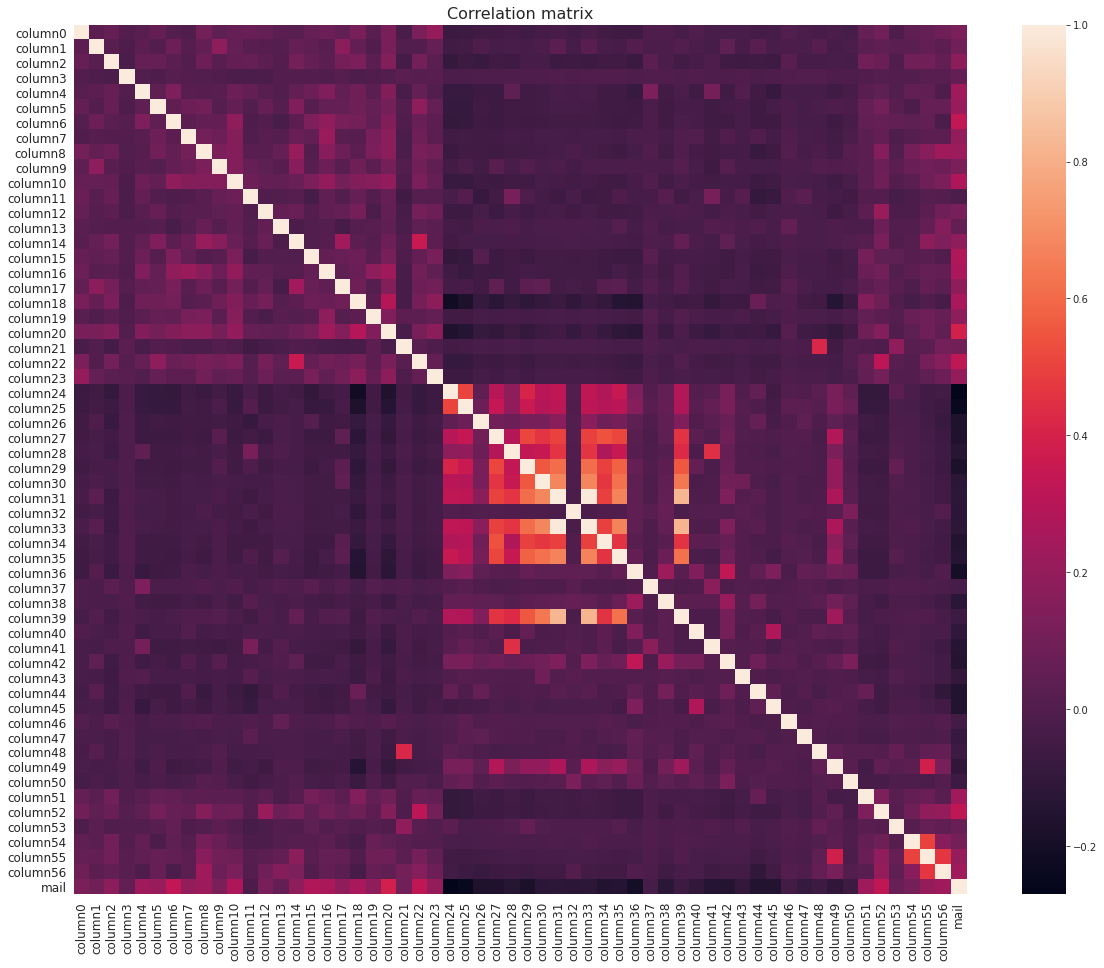

In [24]:
# Correlation Heatmap to check for relationships between the columns

plt.figure(figsize=(20,16)) 
sns.heatmap(spam.corr())
plt.title('Correlation matrix', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12) 
plt.show()

# There are some correlations between some of the features
# I will check for multicollinearity in the next step.

## 7. Feature Selection by testing for multicollinearity
> Multicollinearity is the occurrence of high intercorrelations among 2 or more independent variables in a model with multiple features.

> Testing for multicollinearity is extremely important because it can lead to:

* Inflation of the standard errors of the regression coefficients
* False and non-significant p-values
* Degredation of the predictability of the model

> In the case of building a model with Naive Bayes, removing correlated features is not only a method of feature selection but is also used as an optimization technique. Highly correlated features are voted twice in the model and it can lead to overfitting.

In [25]:
spam.columns

Index(['column0', 'column1', 'column2', 'column3', 'column4', 'column5',
       'column6', 'column7', 'column8', 'column9', 'column10', 'column11',
       'column12', 'column13', 'column14', 'column15', 'column16', 'column17',
       'column18', 'column19', 'column20', 'column21', 'column22', 'column23',
       'column24', 'column25', 'column26', 'column27', 'column28', 'column29',
       'column30', 'column31', 'column32', 'column33', 'column34', 'column35',
       'column36', 'column37', 'column38', 'column39', 'column40', 'column41',
       'column42', 'column43', 'column44', 'column45', 'column46', 'column47',
       'column48', 'column49', 'column50', 'column51', 'column52', 'column53',
       'column54', 'column55', 'column56', 'mail'],
      dtype='object')

In [26]:
# Specifying X and y

X = spam.drop('mail', 1)
y = spam['mail']

In [27]:
# Checking for multicollinearity

correlations = X.corr()

# Creating the VIF dataframe

VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)

# Extracting the VIF values

pd.Series(np.diag(VIF), index=[VIF.columns])

# There is multicollinearity in column 31 and 33 

column0       1.101318
column1       1.107739
column2       1.094231
column3       1.006486
column4       1.111601
column5       1.077883
column6       1.131429
column7       1.107332
column8       1.194526
column9       1.121957
column10      1.182321
column11      1.101700
column12      1.088694
column13      1.049348
column14      1.345465
column15      1.085329
column16      1.205092
column17      1.187926
column18      1.288197
column19      1.086529
column20      1.323276
column21      1.305769
column22      1.331379
column23      1.114751
column24      1.558867
column25      1.497610
column26      1.078323
column27      1.849321
column28      1.815652
column29      2.092758
column30      2.241806
column31    102.289489
column32      1.049045
column33     99.424351
column34      1.665686
column35      2.312064
column36      1.256790
column37      1.064888
column38      1.113681
column39      3.433296
column40      1.125928
column41      1.470592
column42      1.217845
column43   

In [28]:
# Dropping the columns 31 and 33

X.drop(['column31', 'column33'], axis = 1, inplace= True)

X.columns

Index(['column0', 'column1', 'column2', 'column3', 'column4', 'column5',
       'column6', 'column7', 'column8', 'column9', 'column10', 'column11',
       'column12', 'column13', 'column14', 'column15', 'column16', 'column17',
       'column18', 'column19', 'column20', 'column21', 'column22', 'column23',
       'column24', 'column25', 'column26', 'column27', 'column28', 'column29',
       'column30', 'column32', 'column34', 'column35', 'column36', 'column37',
       'column38', 'column39', 'column40', 'column41', 'column42', 'column43',
       'column44', 'column45', 'column46', 'column47', 'column48', 'column49',
       'column50', 'column51', 'column52', 'column53', 'column54', 'column55',
       'column56'],
      dtype='object')

In [29]:
# Checking if there is any multicollinearity left

correlations = X.corr()

# Creating the VIF dataframe

VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)

# Extracting the VIF values

pd.Series(np.diag(VIF), index=[VIF.columns])

# There is no more correlation between the features

column0     1.097232
column1     1.093952
column2     1.093865
column3     1.006407
column4     1.110310
column5     1.077187
column6     1.131194
column7     1.107110
column8     1.193998
column9     1.120853
column10    1.181792
column11    1.097841
column12    1.088494
column13    1.049302
column14    1.344010
column15    1.085231
column16    1.202836
column17    1.170735
column18    1.285695
column19    1.086272
column20    1.321900
column21    1.305208
column22    1.330829
column23    1.114356
column24    1.558695
column25    1.495237
column26    1.071890
column27    1.848943
column28    1.757715
column29    2.050335
column30    2.158678
column32    1.048998
column34    1.658650
column35    2.225996
column36    1.255183
column37    1.064527
column38    1.113605
column39    2.345120
column40    1.125521
column41    1.461866
column42    1.213346
column43    1.034870
column44    1.087947
column45    1.148537
column46    1.012405
column47    1.018387
column48    1.245443
column49    1

## 8. Implementing the solution

### Building a model using Gaussian Naive Bayes

The Naive Bayes Classifier is a statistical classification technique based on the Bayes Theorem. This classifier takes into account the assumption that the effect of a particular feature in a class is independent of other features.

Some of the advantages of using Naive Bayes:

* It is easy and fast to predict the classes of a test dataset. It also performs well in multiclass prediction.
* When assumption of independence holds a Naive Bayes classifier performs better compared to other models like logistic regression.
* It performs well in cases where categorical input variables are being used.

Some disadvantages include:

* The assumption of independent predictors. It is almost impossible that we get a set of predictors which are completely independent.
* Naive Bayes is also sometimes known as a bad estimator so the probability outputs are are not to be taken too seriously.



To evaluate this model, I will not use accuracy because our target variable is unbalanced. Instead, I will use recall.
Recall aims at reducing the False Positives which in this case is mail is spam but is classified as not spam

In [30]:
# Splitting into train and test using 80-20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

# fitting and making predictions

norm = GaussianNB()

norm.fit(X_train, y_train)

y_pred = norm.predict(X_test)

# Evaluating the model

print('Accuracy:', accuracy_score(y_test, y_pred), '\n')
print(confusion_matrix(y_test, y_pred), '\n')
print( classification_report(y_test, y_pred))

Accuracy: 0.8408551068883611 

[[387 113]
 [ 21 321]] 

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       500
           1       0.74      0.94      0.83       342

    accuracy                           0.84       842
   macro avg       0.84      0.86      0.84       842
weighted avg       0.86      0.84      0.84       842



In [31]:
# Splitting into train and test using 70-30 ratio

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 99)

# fitting and making predictions

norm = GaussianNB()

norm.fit(X_train1, y_train1)

y_pred1 = norm.predict(X_test1)

# Evaluating the model

print('Accuracy:', accuracy_score(y_test1, y_pred1), '\n')
print(confusion_matrix(y_test1, y_pred1), '\n')
print( classification_report(y_test1, y_pred1))

Accuracy: 0.8424386381631037 

[[580 173]
 [ 26 484]] 

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       753
           1       0.74      0.95      0.83       510

    accuracy                           0.84      1263
   macro avg       0.85      0.86      0.84      1263
weighted avg       0.87      0.84      0.84      1263



In [32]:
# Splitting into train and test using 60-40 ratio

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.4, random_state = 99)

# fitting and making predictions

norm = GaussianNB()

norm.fit(X_train2, y_train2)

y_pred2 = norm.predict(X_test2)

# Evaluating the model

print('Accuracy:', accuracy_score(y_test2, y_pred2), '\n')
print(confusion_matrix(y_test2, y_pred2), '\n')
print( classification_report(y_test2, y_pred2))

Accuracy: 0.8378859857482185 

[[766 230]
 [ 43 645]] 

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       996
           1       0.74      0.94      0.83       688

    accuracy                           0.84      1684
   macro avg       0.84      0.85      0.84      1684
weighted avg       0.86      0.84      0.84      1684



All the models have the same level of recall at 77%. 

If assessing using the accuracy, the 70-30 split built the model with the highest accuracy at 84.24%.


**Model Optimization using the 70-30 split**

In [39]:
# Splitting into train and test using 70-30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

# Normalization

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Dimentionality reduction using LDA

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Fitting and making predictions

norm = GaussianNB()

norm.fit(X_train, y_train)

y_pred = norm.predict(X_test)

# Evaluating the model

print('Accuracy:', accuracy_score(y_test, y_pred), '\n')
print(confusion_matrix(y_test, y_pred), '\n')
print( classification_report(y_test, y_pred))

Accuracy: 0.8836104513064132 

[[717  36]
 [111 399]] 

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       753
           1       0.92      0.78      0.84       510

    accuracy                           0.88      1263
   macro avg       0.89      0.87      0.88      1263
weighted avg       0.89      0.88      0.88      1263



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(55, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Using dimensionality reduction and Normalization, the recall increased from 77% to 95%.

The accuracy of the model also increased from 84.4% to 88.36%

From the first row of the confusion matrix we see that:
* 717 emails were correctly classified as not spam 
* 36 emails were wrongly classified as spam.

From the second row of the confusion matrix we see that 
* 111 emails were spam but were classified as not spam 
* 399 emails were correctly classified as spam

## 9. Challenging the solution




**Building an SVM model**

In [50]:
# Importing the SVC library

from sklearn.svm import SVC

# Splitting into train and test using 70-30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

# Normalization

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Dimentionality reduction using LDA

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Fitting and making predictions

svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# Evaluating the model

print('Accuracy:', accuracy_score(y_test, y_pred), '\n')
print(confusion_matrix(y_test, y_pred), '\n')
print( classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(55, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Accuracy: 0.9041963578780681 

[[706  47]
 [ 74 436]] 

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       753
           1       0.90      0.85      0.88       510

    accuracy                           0.90      1263
   macro avg       0.90      0.90      0.90      1263
weighted avg       0.90      0.90      0.90      1263



Without any hyperparameter tuning, the accuracy increased to 90%. However, the recall dropped to 94% from 95%

From the first row of the confusion matrix we see that:
* 706 emails were correctly classified as not spam 
* 47 emails were wrongly classified as spam.

From the second row of the confusion matrix we see that 
* 74 emails were spam but were classified as not spam 
* 436 emails were correctly classified as spam

## 10. Conclusion

Some of the conclusions that can be made from this project:

- Reducing the dimensionality of a high dimensional dataset will increase the accuracy of the model created using Naive Bayes.
- Removing correlated features helps to optimize the model.
- Feature scaling is also very important to improve the model's performance